In [637]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import seaborn as sns
%matplotlib inline

In [638]:
data = pd.read_csv('cars-dataset.csv')
#data = data.dropna()
data.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [639]:
data.shape

(398, 8)

In [640]:
data.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [641]:
data.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [642]:
data.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

- data type for hp is object. It should be be int. So there is some problem in 'hp' column.

In [643]:
data.apply(lambda x: len(x.unique()))

car name    305
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
mpg         129
dtype: int64

In [644]:
data.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

- In 'hp' column there are '?' which should be removed

In [645]:
data=data[data.hp != '?']
data.shape

(392, 8)

In [646]:
data['hp']=data['hp'].astype(int)

In [647]:
data.dtypes

car name     object
cyl           int64
disp        float64
hp            int32
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [648]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


In [649]:
# new data frame with split value columns 
new = data["car name"].str.split(" ", n = 1, expand = True) 
new  
# making separate Mfg column from new data frame 
data["Mfg"]= new[0] 
  
# making separate model name column from new data frame 
data["Model Name"]= new[1] 
data.head(5)  
# Dropping old car Name columns 
data.drop(columns =["car name"], inplace = True) 
data.head(5)  

,cyl,disp,hp,wt,acc,yr,mpg,Mfg,Model Name
0,8,307.0,130,3504,12.0,70,18.0,chevrolet,chevelle malibu
1,8,350.0,165,3693,11.5,70,15.0,buick,skylark 320
2,8,318.0,150,3436,11.0,70,18.0,plymouth,satellite
3,8,304.0,150,3433,12.0,70,16.0,amc,rebel sst
4,8,302.0,140,3449,10.5,70,17.0,ford,torino


In [650]:
data.Mfg.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [651]:
data["Mfg"].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
peugeot           8
fiat              8
audi              7
volvo             6
vw                6
chrysler          6
subaru            4
saab              4
opel              4
chevy             3
renault           3
maxda             2
cadillac          2
mercedes-benz     2
bmw               2
capri             1
triumph           1
chevroelt         1
mercedes          1
nissan            1
toyouta           1
vokswagen         1
hi                1
Name: Mfg, dtype: int64

In [652]:
data["Mfg"]= data["Mfg"].replace("chevy", "chevrolet") 
data["Mfg"]= data["Mfg"].replace("chevroelt", "chevrolet") 
data["Mfg"]= data["Mfg"].replace("hi", "honda")
data["Mfg"]= data["Mfg"].replace("mercedes", "mercedes-benz")
data["Mfg"]= data["Mfg"].replace("maxda", "mazda")
data["Mfg"]= data["Mfg"].replace("toyouta", "toyota")
data["Mfg"]= data["Mfg"].replace("vokswagen", "volkswagen")
data["Mfg"]= data["Mfg"].replace("vw", "volkswagen")

In [653]:
data["Mfg"].value_counts()

ford             48
chevrolet        47
plymouth         31
dodge            28
amc              27
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            14
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
subaru            4
saab              4
opel              4
renault           3
mercedes-benz     3
cadillac          2
bmw               2
triumph           1
capri             1
nissan            1
Name: Mfg, dtype: int64

In [654]:
data.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,Mfg,Model Name
0,8,307.0,130,3504,12.0,70,18.0,chevrolet,chevelle malibu
1,8,350.0,165,3693,11.5,70,15.0,buick,skylark 320
2,8,318.0,150,3436,11.0,70,18.0,plymouth,satellite
3,8,304.0,150,3433,12.0,70,16.0,amc,rebel sst
4,8,302.0,140,3449,10.5,70,17.0,ford,torino


In [655]:
data.Mfg.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'honda', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'subaru', 'capri',
       'mercedes-benz', 'cadillac', 'triumph', 'nissan'], dtype=object)

In [656]:
A=['chevrolet','buick','plymouth','amc','ford','pontiac','dodge','chrysler','cadillac','mercury','oldsmobile','capri']

In [657]:
B=['volkswagen','peugeot','peugeot','audi','saab','bmw','opel','fiat','volvo','renault','mercedes-benz','triumph']

In [658]:
C=['toyota','datsun','honda','mazda','subaru','nissan']

In [659]:
def Mfg_name(Mfg):
    if Mfg in A:
        return 'American'
    elif Mfg in B:
        return 'European'
    else:
        return 'Japanese'

In [660]:
data['region'] = data['Mfg'].apply(Mfg_name)

In [661]:
data.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,Mfg,Model Name,region
0,8,307.0,130,3504,12.0,70,18.0,chevrolet,chevelle malibu,American
1,8,350.0,165,3693,11.5,70,15.0,buick,skylark 320,American
2,8,318.0,150,3436,11.0,70,18.0,plymouth,satellite,American
3,8,304.0,150,3433,12.0,70,16.0,amc,rebel sst,American
4,8,302.0,140,3449,10.5,70,17.0,ford,torino,American


In [662]:
print('American mean mpg', data[data.region == 'American'].mpg.mean())
print('European mean mpg', data[data.region == 'European'].mpg.mean())
print('Japanese mean mpg', data[data.region == 'Japanese'].mpg.mean())

American mean mpg 20.07868852459016
European mean mpg 27.602941176470587
Japanese mean mpg 30.182499999999994


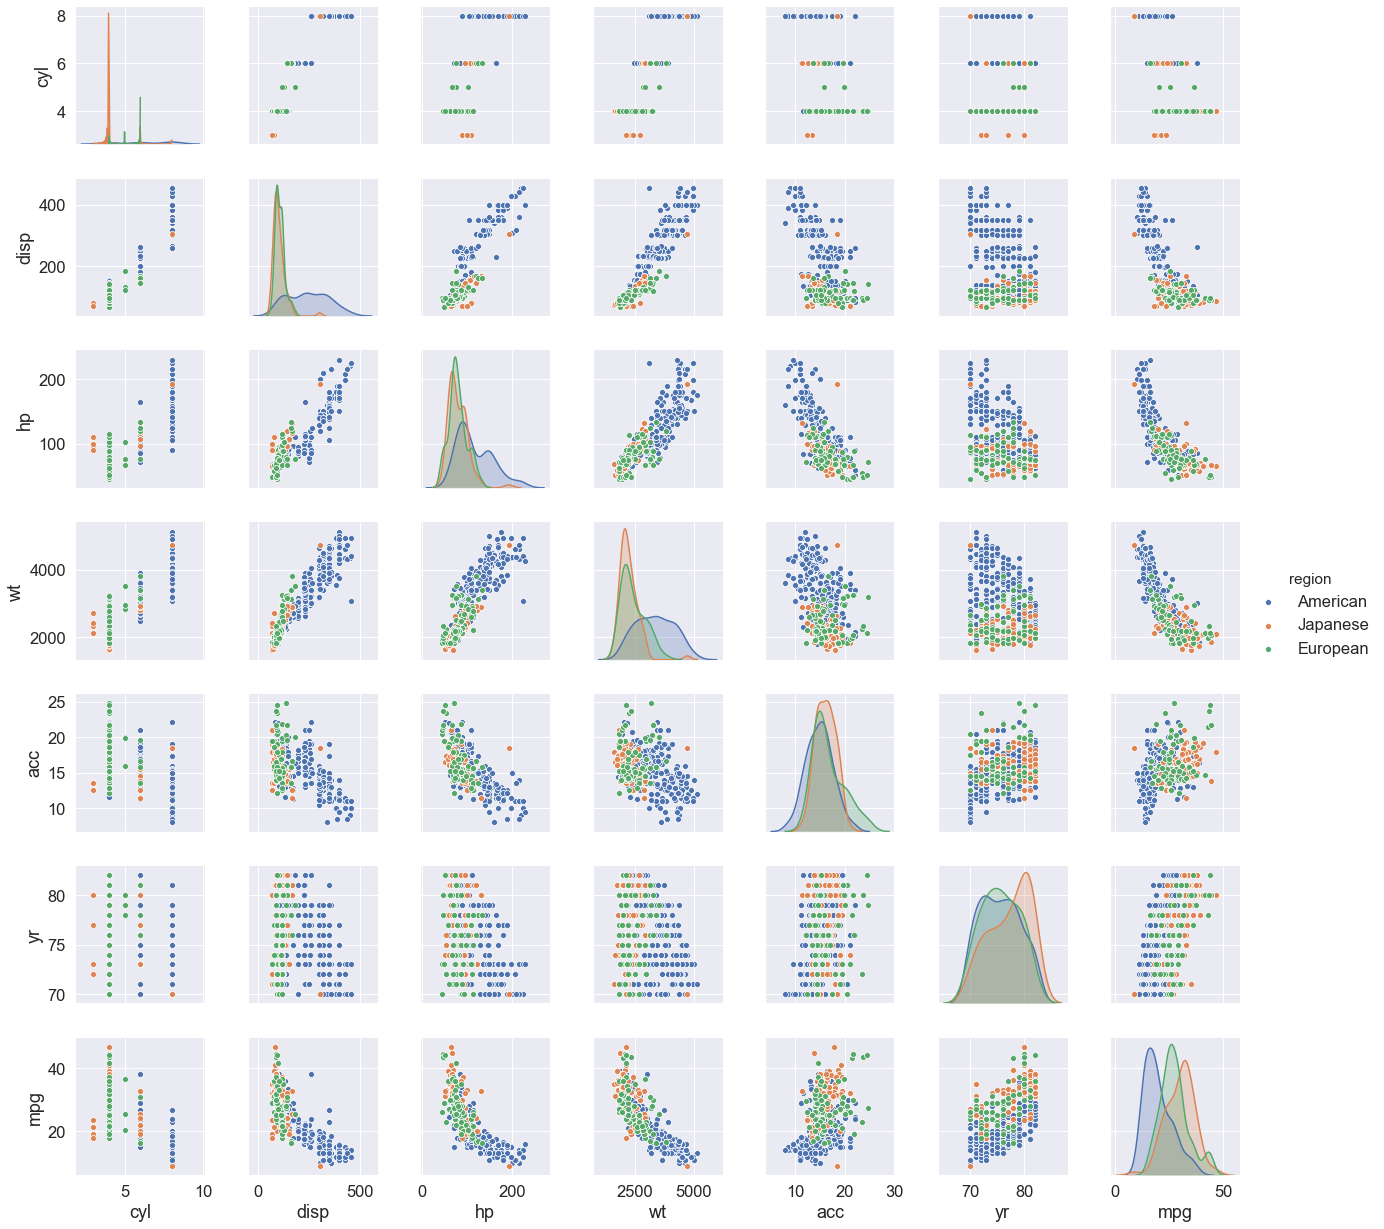

In [663]:
sns.set(font_scale=1.5)
sns.pairplot(data, hue='region');

### Observations
- 'cyl', 'disp', 'hp' and 'wt' are highly positively correlated among themselves. 
- Target variable 'mpg' is negatively correlated with almost all the variables except year
- Mpg is positively correlated with year. So, over the period of years mpg has also improved.
- 'mpg' shows high correlation with 'cyl','disp', 'hp', and 'wt'
- We can also see that higher cylinders are generally reserved for heavier cars
- 4 and 5 cylinder cars have higher mileage
- 8 cylinder cars are mostly American and these cars have lower mileage and higher hp, disp and wt
- There seems to be between 2-3 distinct clusters in the data. We will see this later during model building phase

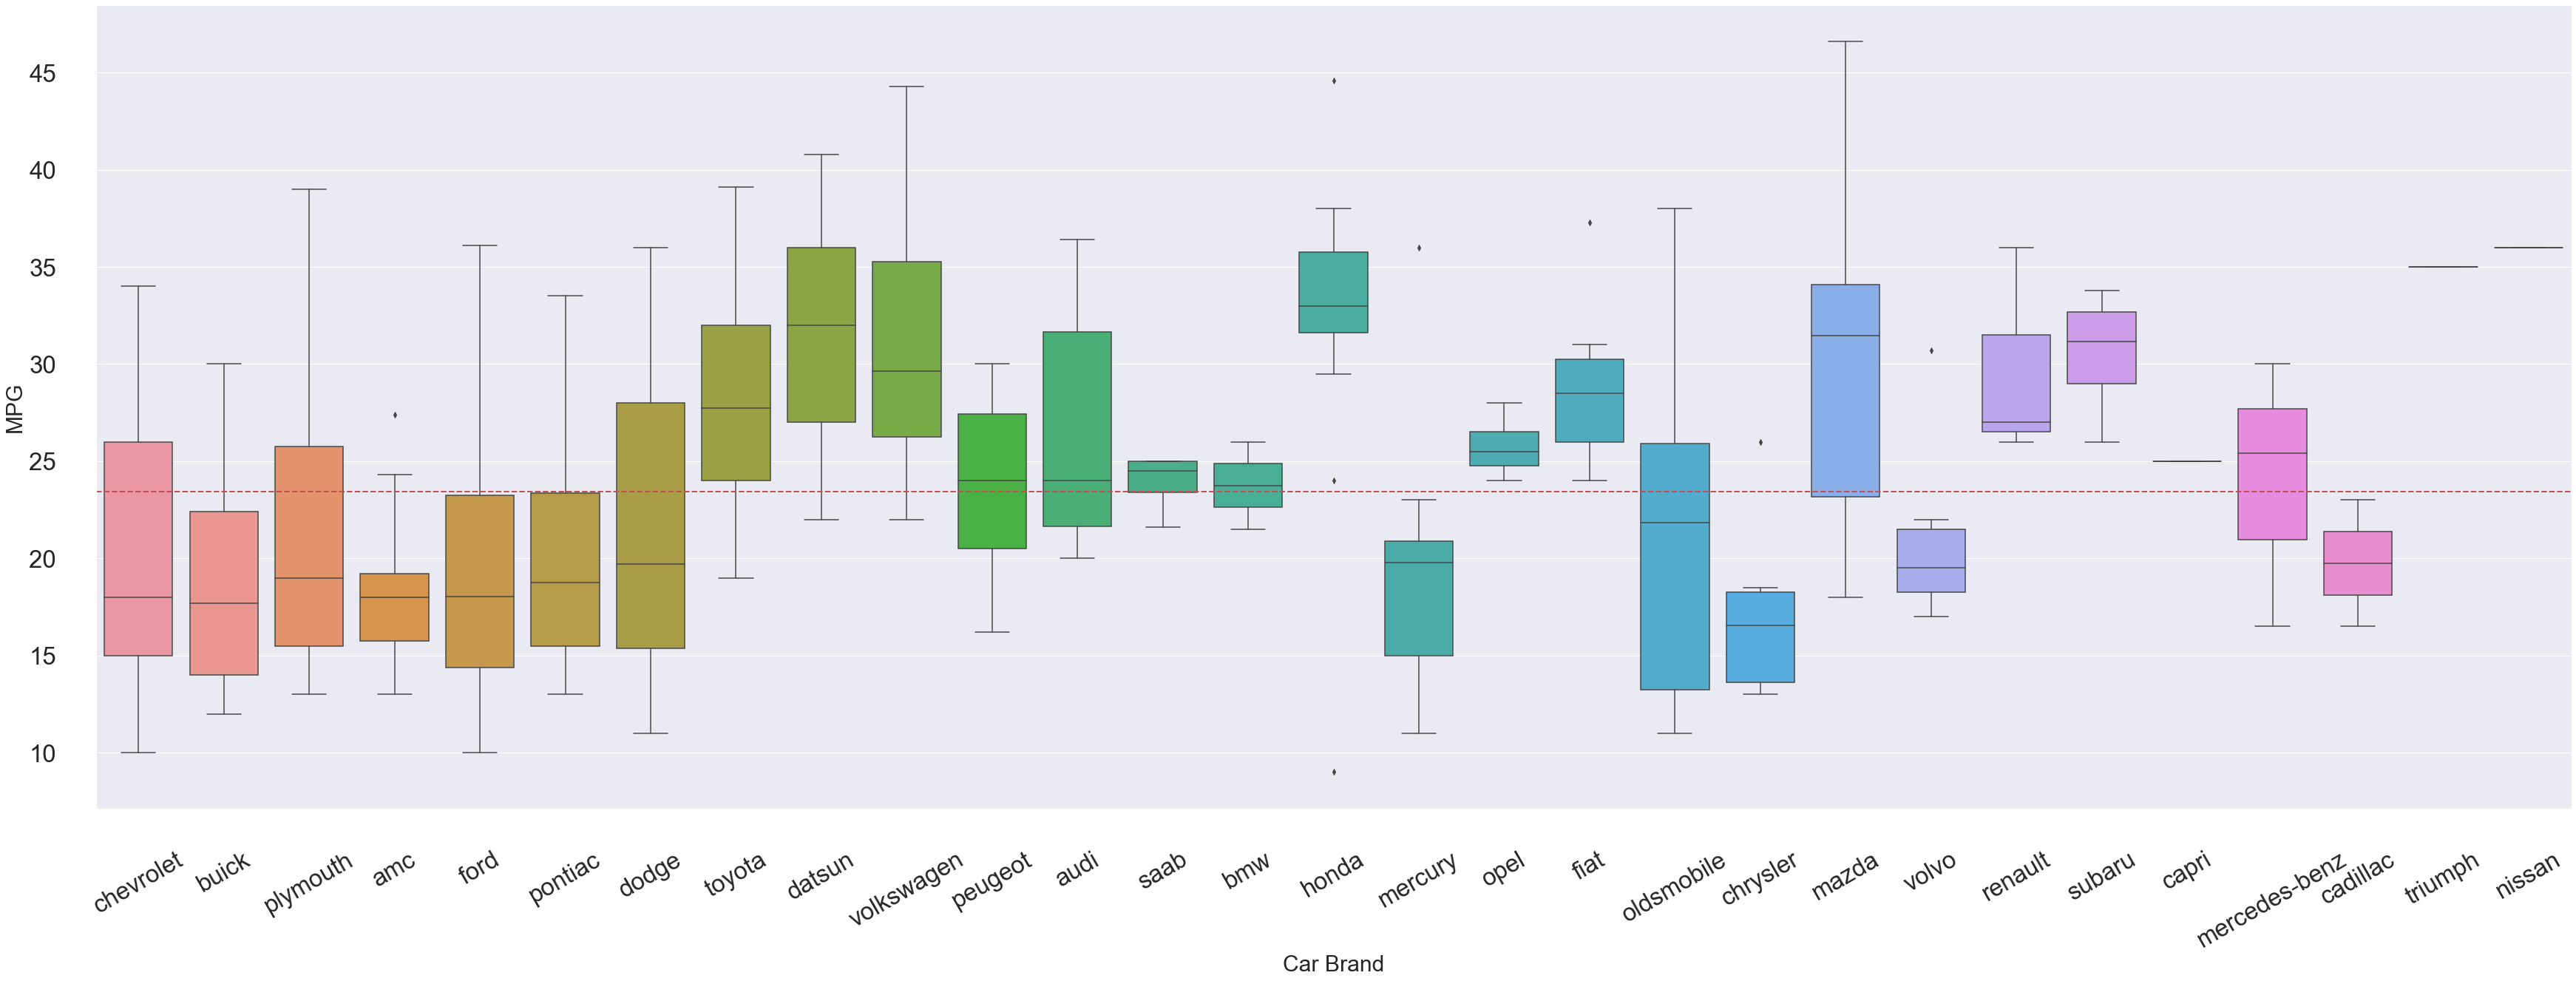

In [664]:
#sns.set_context('poster')
sns.set(font_scale=3)
#var = 'Company_Name'
#data_plt = pd.concat([data_rem['mpg'], data_rem[var]], axis=1)
f, ax = plt.subplots(figsize=(60, 20))
fig = sns.boxplot(x='Mfg', y="mpg", data=data)
#fig.axis(ymin=0, ymax=1)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
fig.set_xlabel("Car Brand",fontsize=30)
fig.set_ylabel("MPG",fontsize=30)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.tick_params(size=50)

### Observations
- We see that American manufacturers like Chevrolet, Buick, Plymouth, Ford etc have lower 'mpg' values as compared to other manufactures
- European manufacturres like saab and audi have 'mpg' close to the mean
- Japanese manufacturers have very high 'mpg values'

C:\Users\yf9852\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


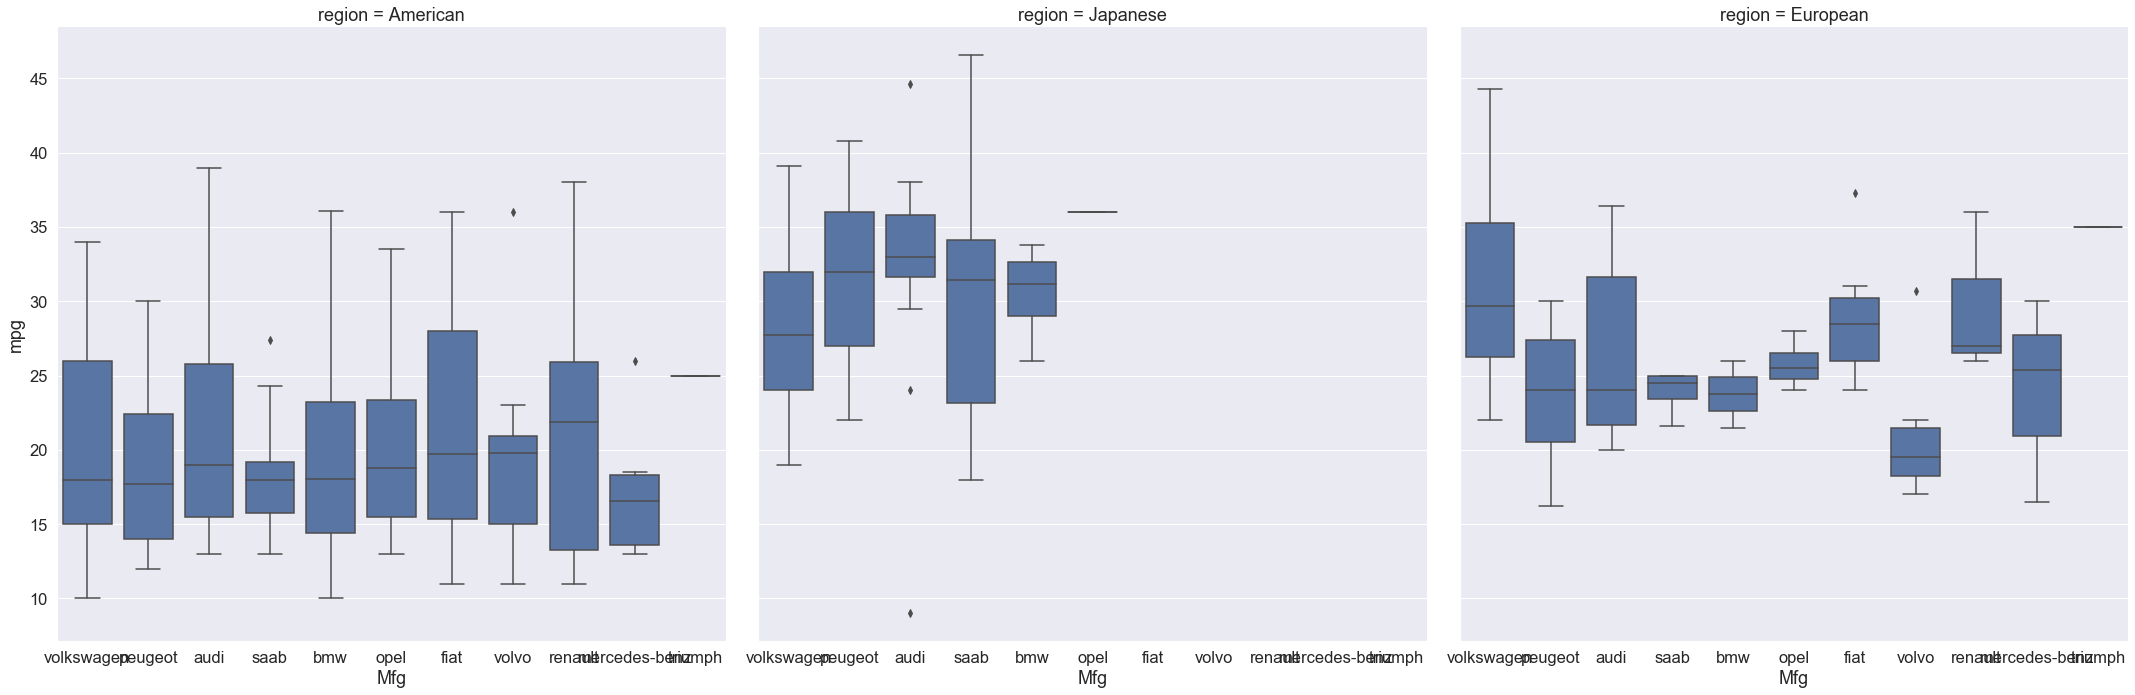

In [665]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(data, col='region',height = 10)
g = g.map(sns.boxplot,"Mfg", "mpg")


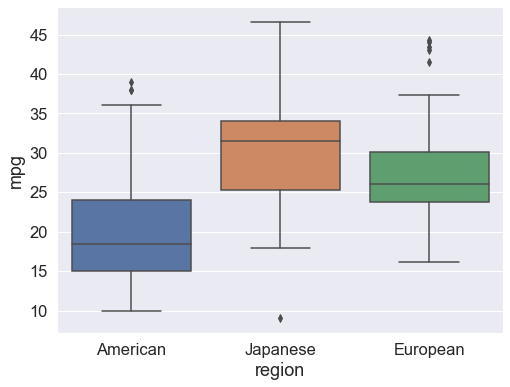

In [666]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='region', y="mpg", data=data)

- Japanese car have higher mileage and American cars has lowest mileage

C:\Users\yf9852\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


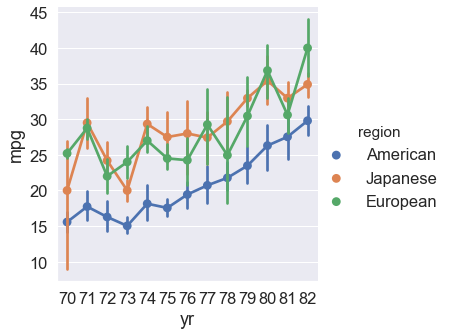

In [667]:
sns.set(font_scale=1.5)
sns.factorplot(x='yr',y='mpg',data=data,hue = 'region')

- Over the years all car manufactures in 3 region have improved their mileage.

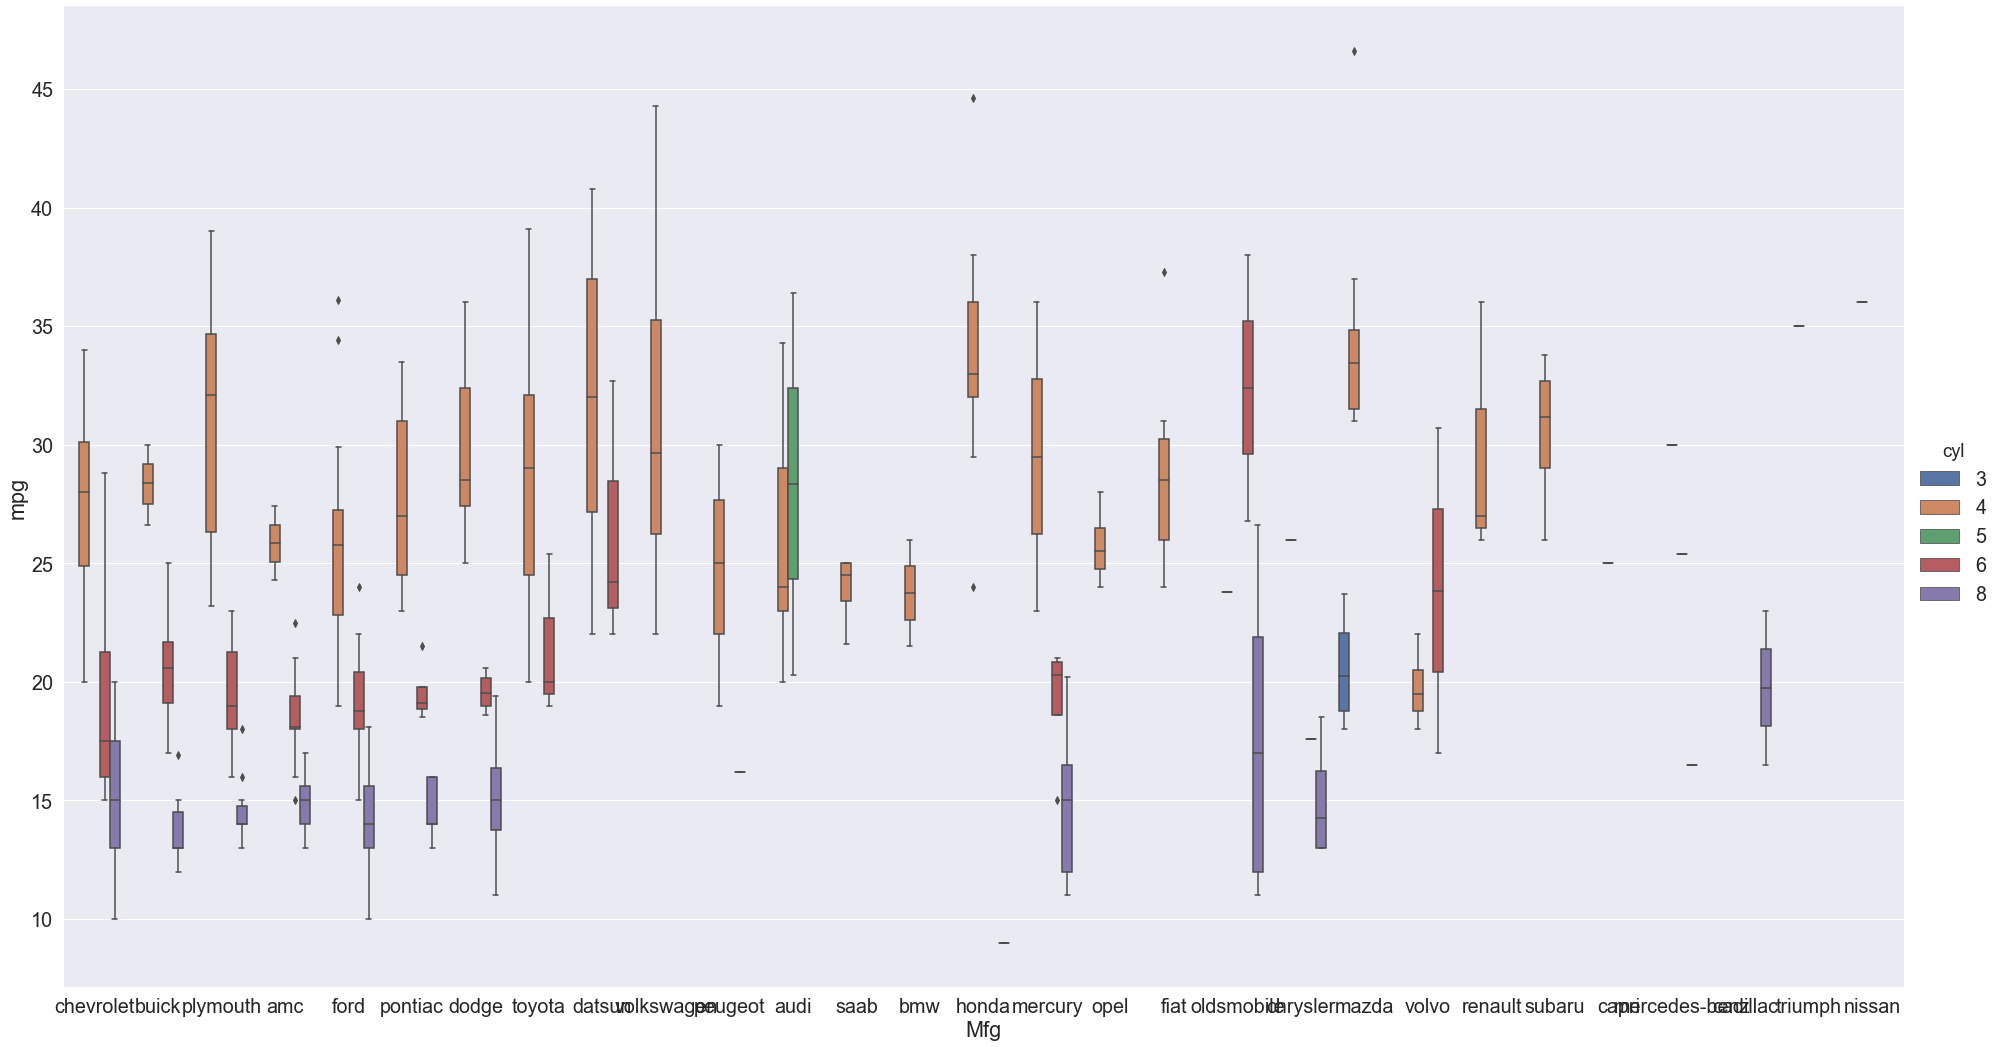

In [783]:
#sns.set(xlim=(0, 60), ylim=(0, 14));
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=1.8)
sns.catplot(x='Mfg',y='mpg',data=data, hue = 'cyl',kind = 'box',height=15, aspect=1.8)

- 4 cyl cars have higher mileage and 6 and 8 cyl cars has lowest mileage

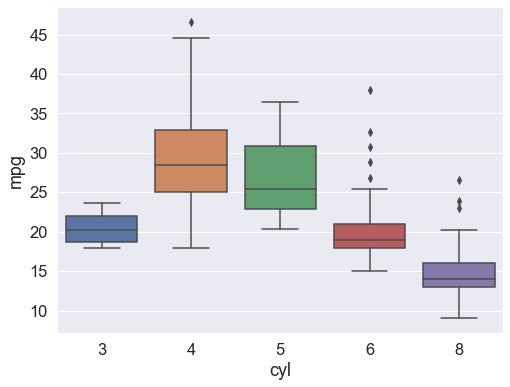

In [784]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='cyl', y="mpg", data=data)

### Insight
- As number of cylinders increase from 4 to 8, the fuel efficiency decreases
- Higher number of cylinders seems to have some high outliers

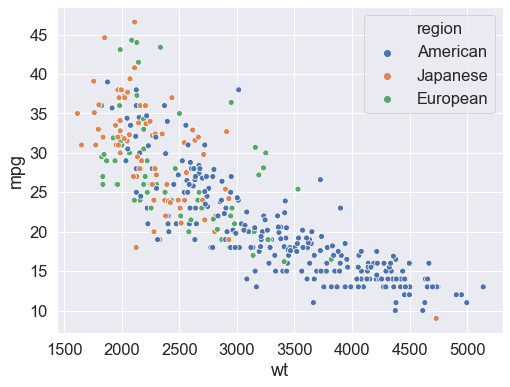

In [789]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x='wt', y="mpg", hue = 'region',data=data)

- As weight of the car increases mileage decreases
- Heavier car mostly American

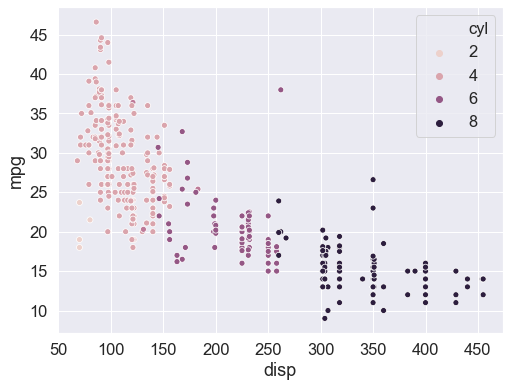

In [791]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x='disp', y="mpg", hue = 'cyl',data=data)

- higher no of cylinder, higher the disp
- Mileage decreases as disp increases

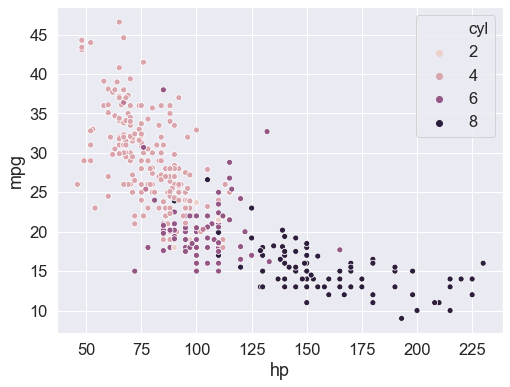

In [792]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x='hp', y="mpg", hue = 'cyl',data=data)

- low no cyl has low hp and lower mileage
- Higher no cyl has high hp and low mileage

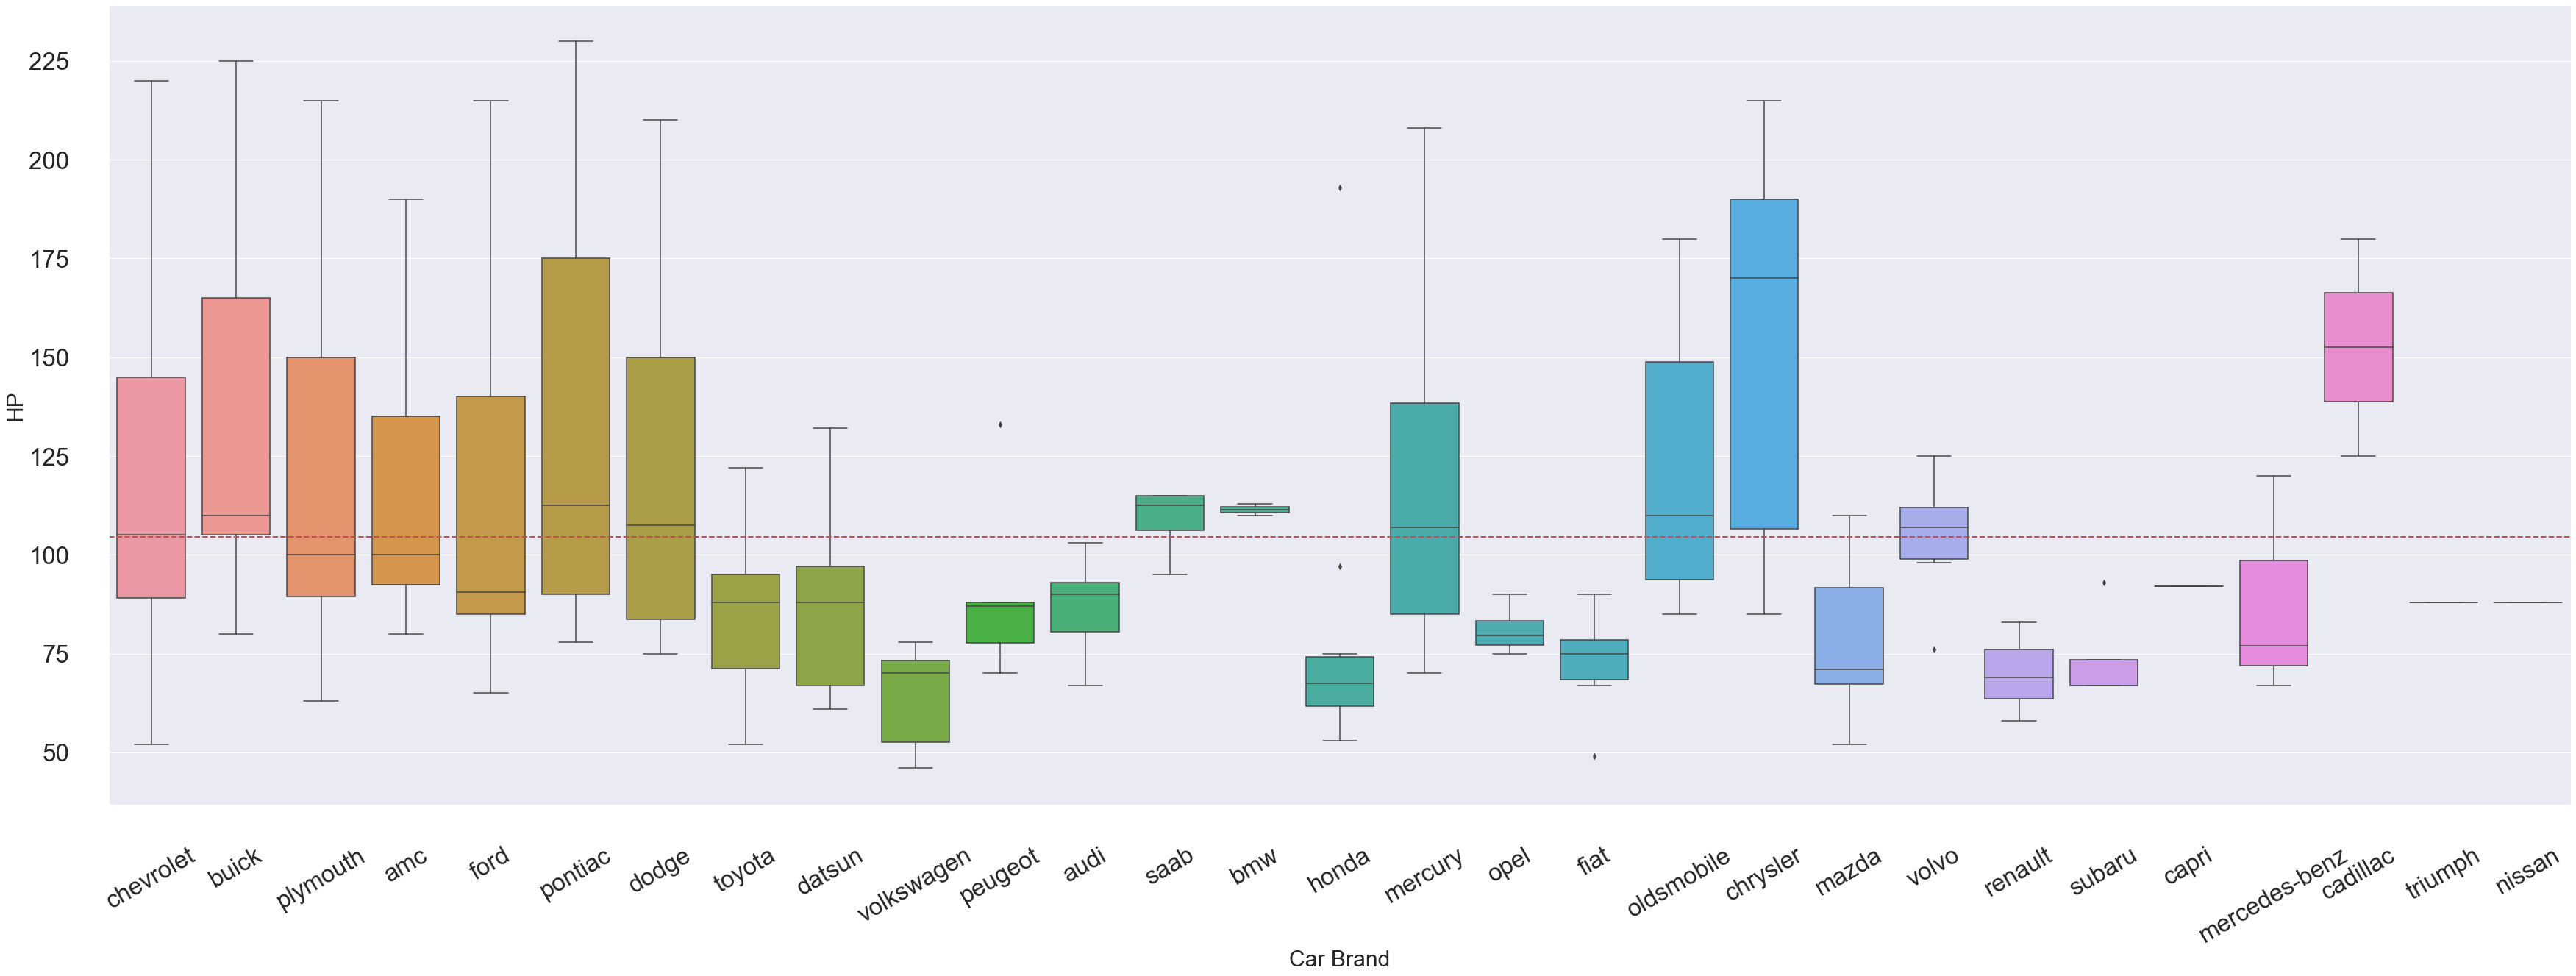

In [669]:
#sns.set_context('poster')
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(60, 20))
fig = sns.boxplot(x='Mfg', y="hp", data=data)
#fig.axis(ymin=0, ymax=1)
plt.axhline(data.hp.mean(),color='r',linestyle='dashed',linewidth=2)
fig.set_xlabel("Car Brand",fontsize=30)
fig.set_ylabel("HP",fontsize=30)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.tick_params(size=50)

### Observations

- Very interetingly it is seen that almost all american manufacturers have very high spread of horse power as compared to others
- Almost all of the american manufacturers have a positive skew
- Asian and European manufacturers have very tigfht and narrow horsepower distribution 

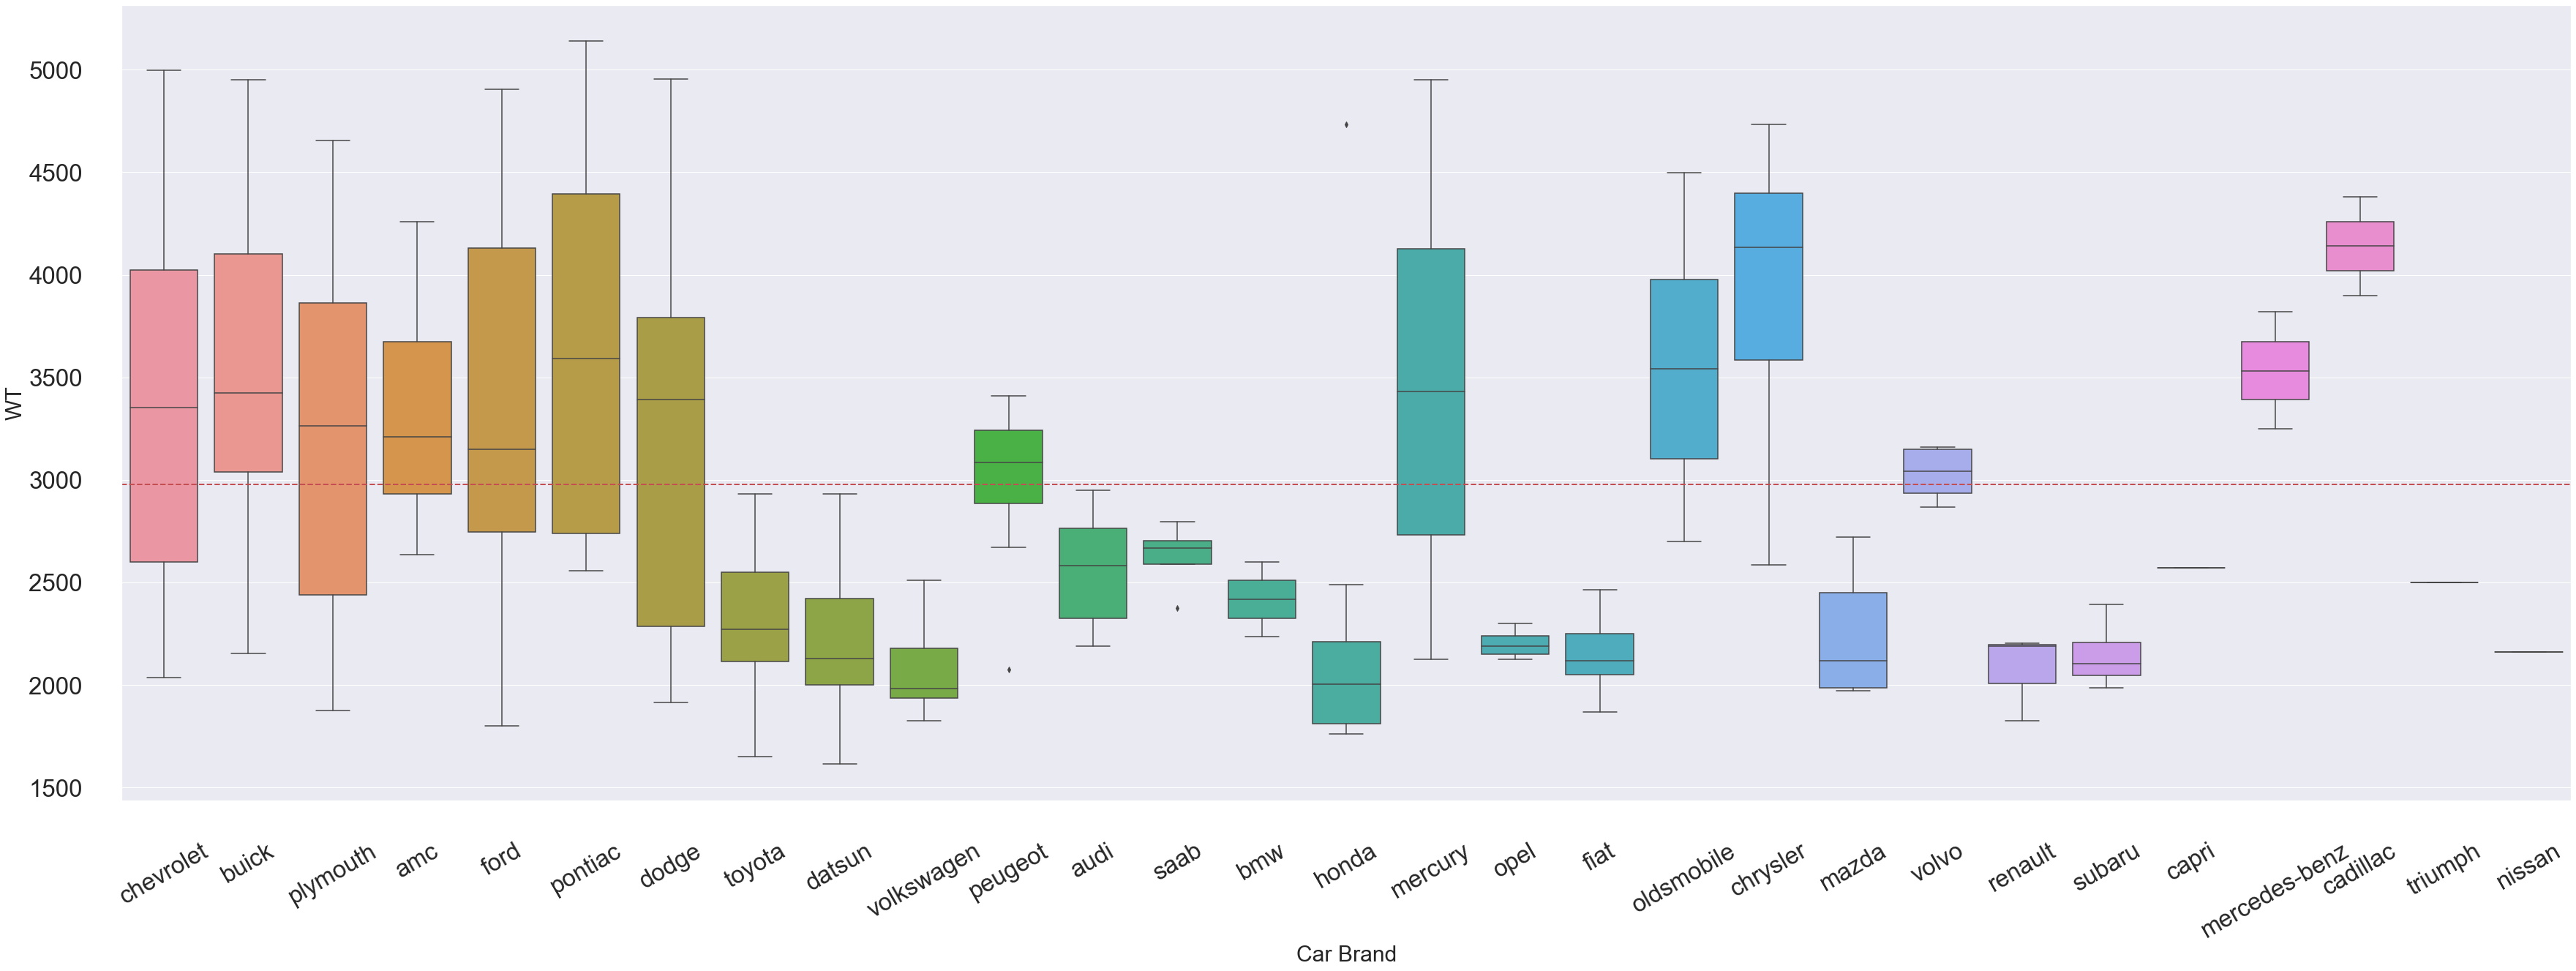

In [670]:
#sns.set_context('poster')
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(60, 20))
fig = sns.boxplot(x='Mfg', y="wt", data=data)
#fig.axis(ymin=0, ymax=1)
plt.axhline(data.wt.mean(),color='r',linestyle='dashed',linewidth=2)
fig.set_xlabel("Car Brand",fontsize=30)
fig.set_ylabel("WT",fontsize=30)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.tick_params(size=50)

### Observations

- As expected from the discussion on horsepower, American manufacturers have the heaviest cars (with a large spread)
- Europeana and Asian manufacturers have lighter cars (narrow distributions)
- Asian cars are the lightests
- This is a trend we see even in the present day
- VW is the lightest European car manyfacturer and Mercedees is the heaviest for Europe

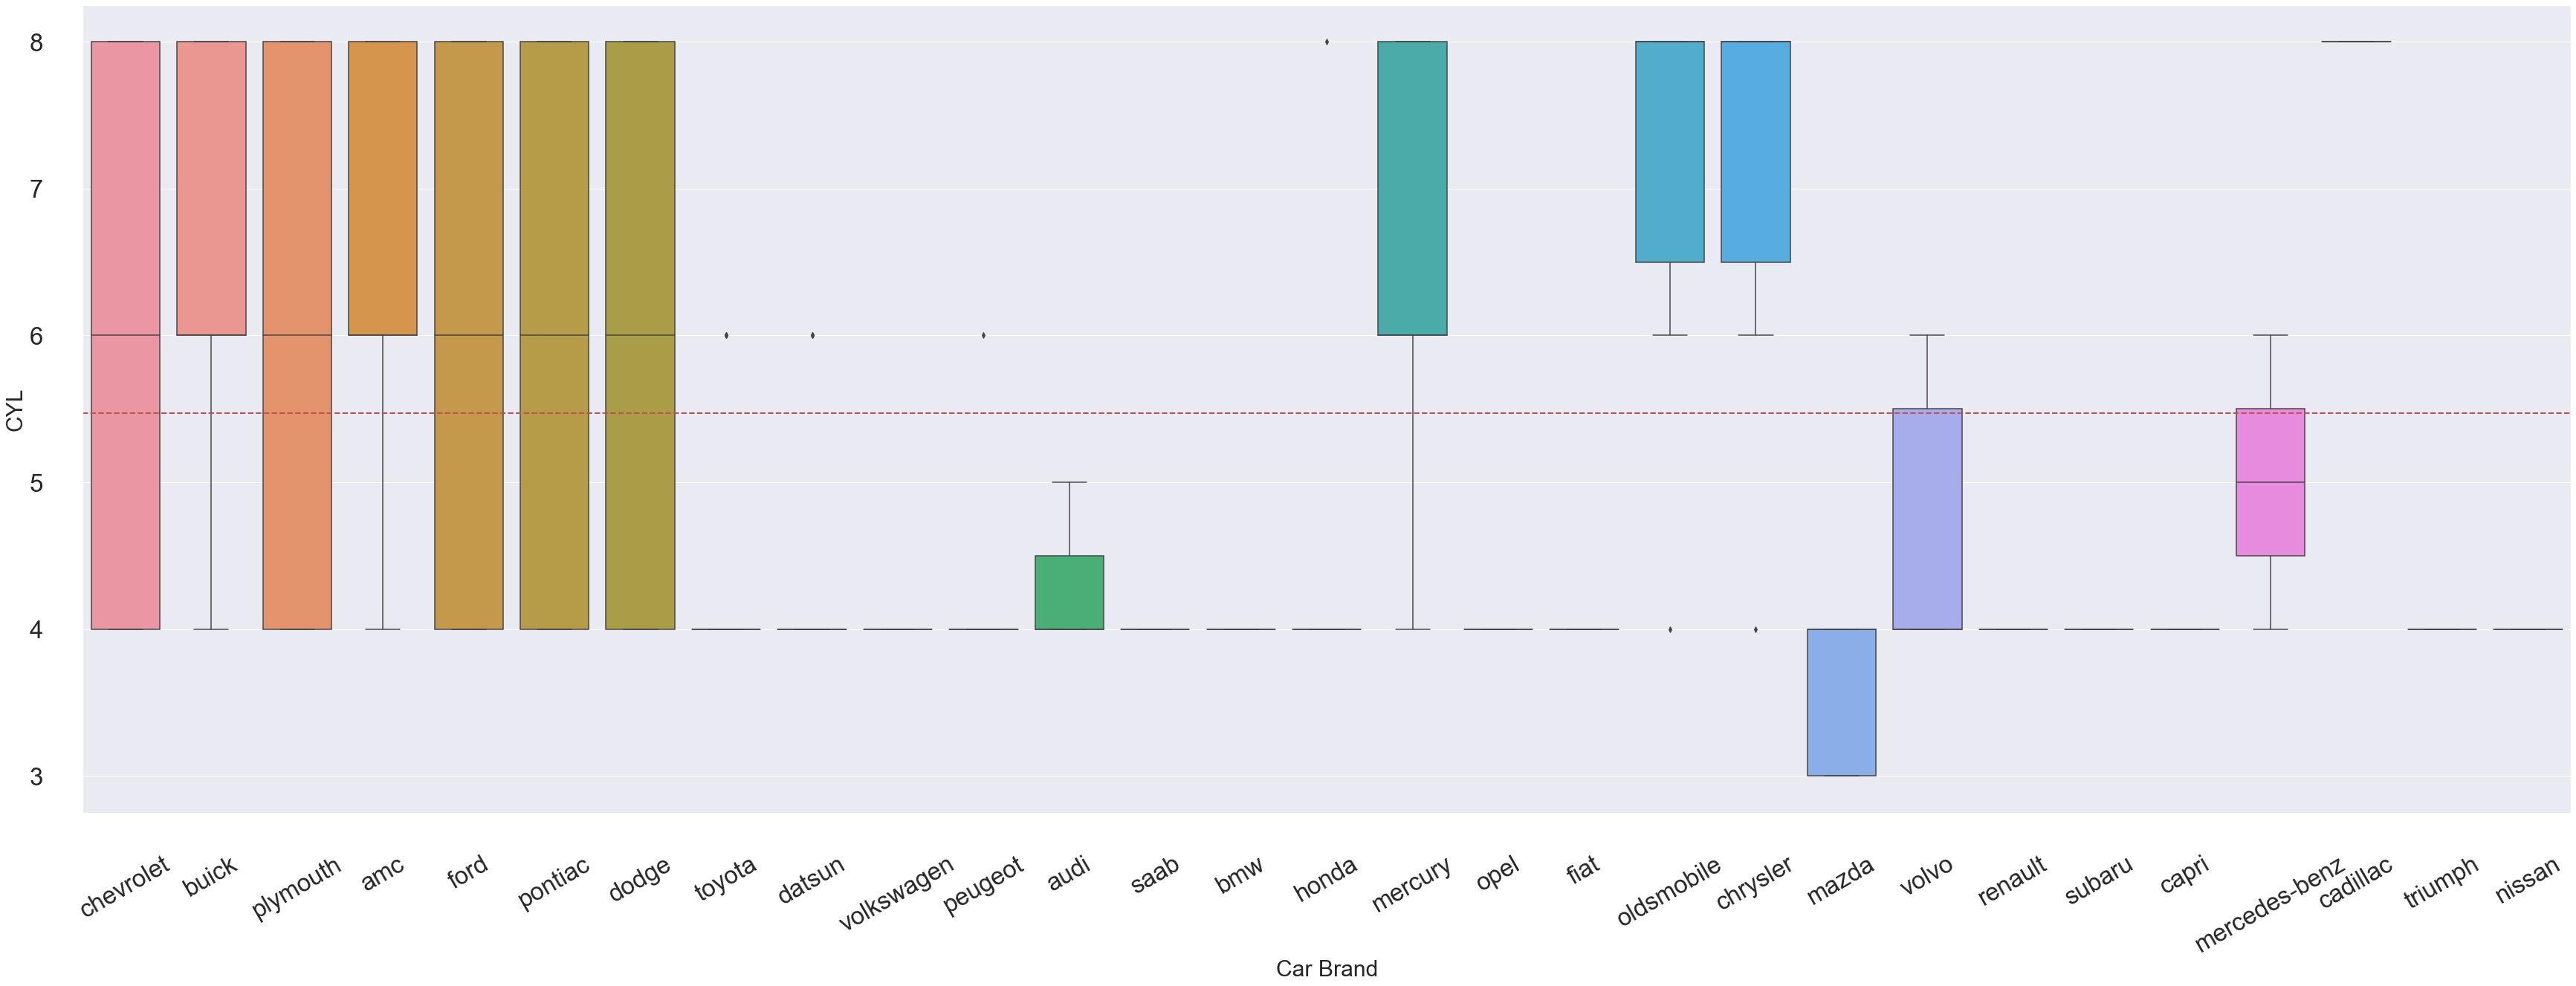

In [671]:
#sns.set_context('poster')
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(60, 20))
fig = sns.boxplot(x='Mfg', y="cyl", data=data)
#fig.axis(ymin=0, ymax=1)
plt.axhline(data.cyl.mean(),color='r',linestyle='dashed',linewidth=2)
fig.set_xlabel("Car Brand",fontsize=30)
fig.set_ylabel("CYL",fontsize=30)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.tick_params(size=50)

### Observations 

- Asian and European car manufacturers exclusively stick to 4 cylinders for higher mileage
- Americans use 6 as standard
- Only Volvo and Merceedes use high number of cylinders in their cars for European car makers

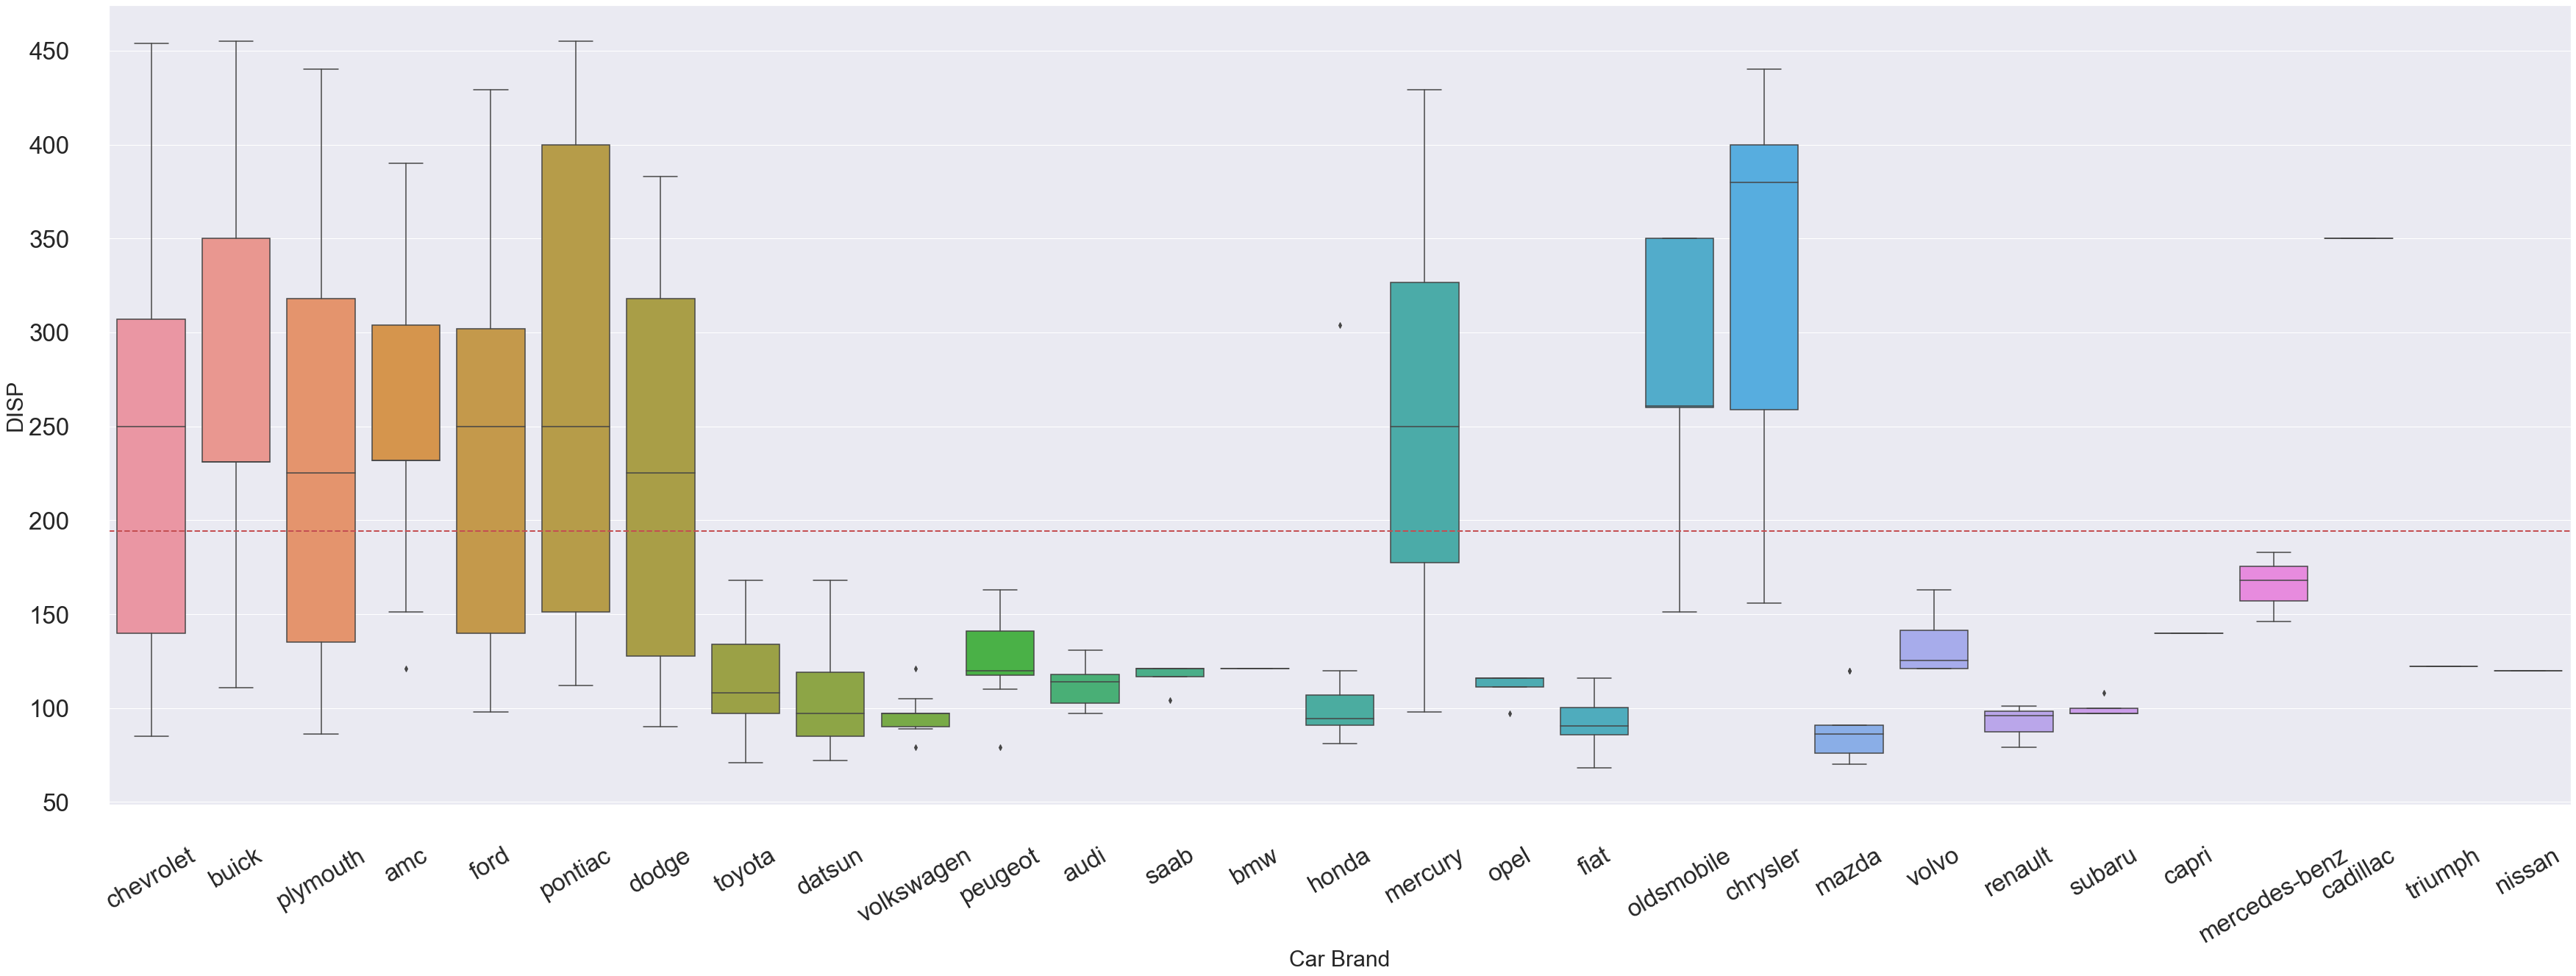

In [672]:
#sns.set_context('poster')
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(60, 20))
fig = sns.boxplot(x='Mfg', y="disp", data=data)
#fig.axis(ymin=0, ymax=1)
plt.axhline(data.disp.mean(),color='r',linestyle='dashed',linewidth=2)
fig.set_xlabel("Car Brand",fontsize=30)
fig.set_ylabel("DISP",fontsize=30)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.tick_params(size=50)

### Observations 

- Following the trend of the discussion so far, American cars have higher displacement as compared to Asian and Europeans
- They also have a higher spread of distribution

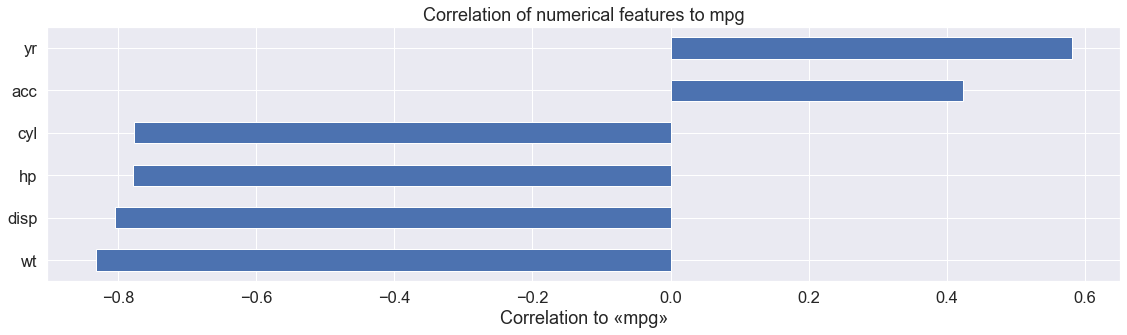

In [673]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16,5))
mat_corr["mpg"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to mpg")
plt.xlabel("Correlation to «mpg»")
plt.tight_layout()
plt.show()

### Observations

- Most variables have a negative correlation with mpg
- wt, disp, hp, cyl all have high negative correlation 
- The fact that newer cars have higher mileage gives 'yr' somewhat of a high positive correlation 

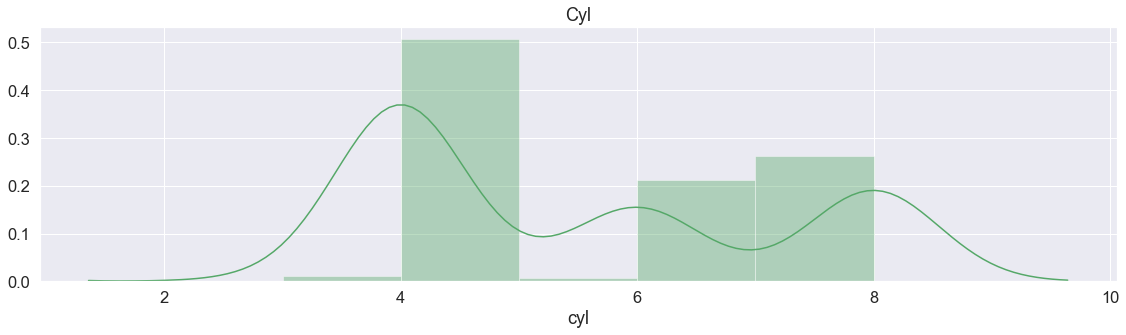

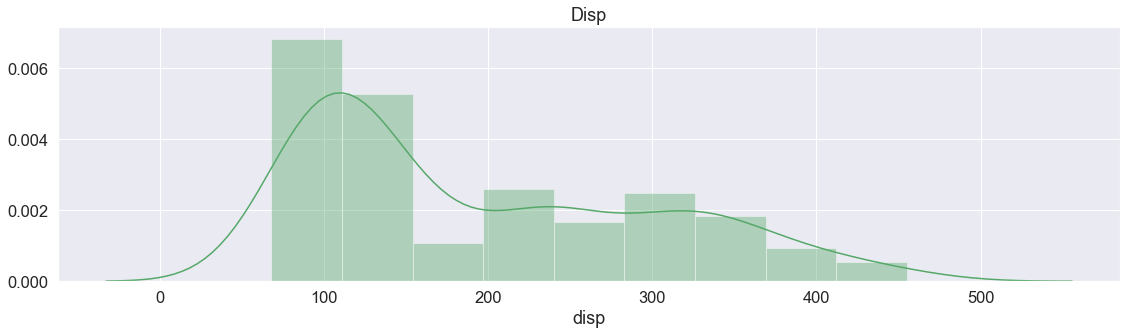

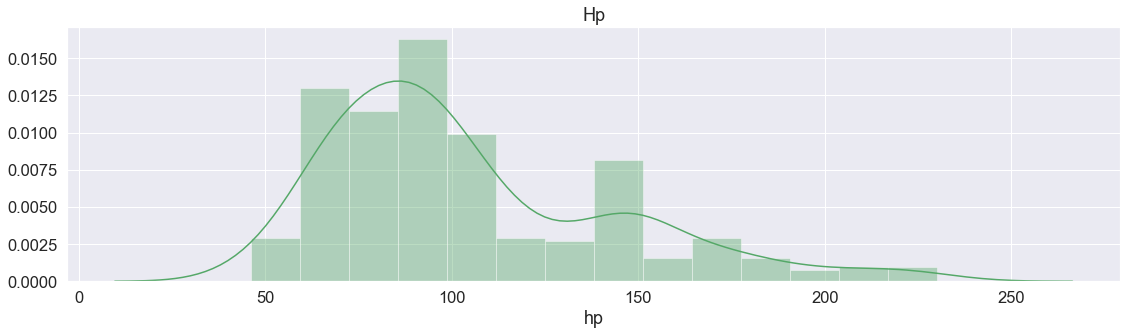

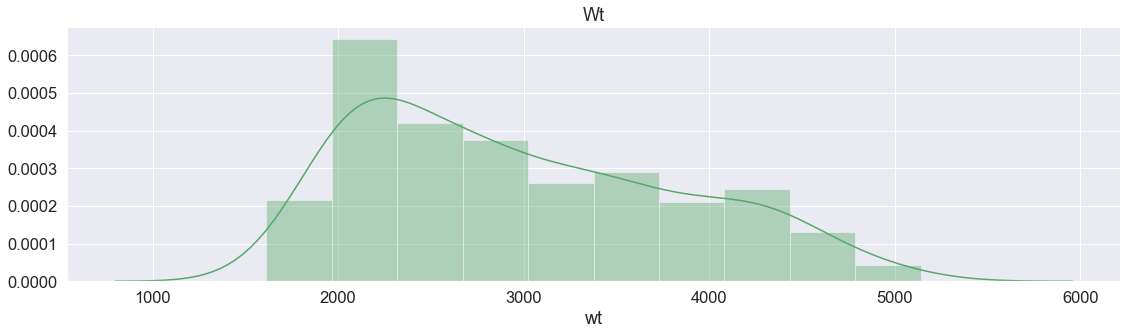

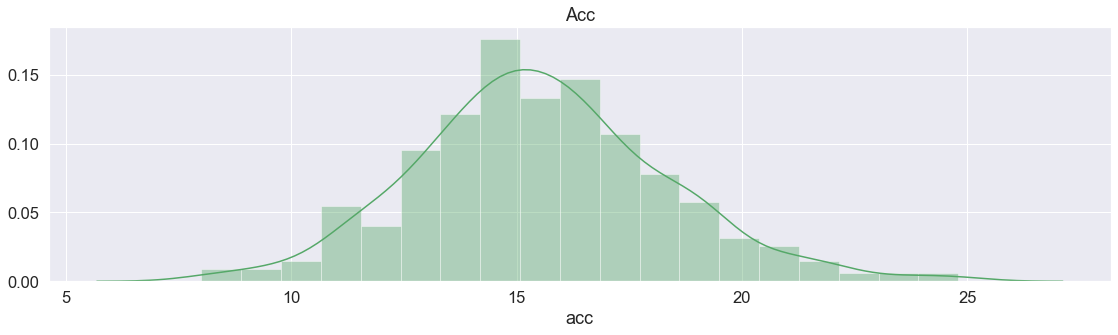

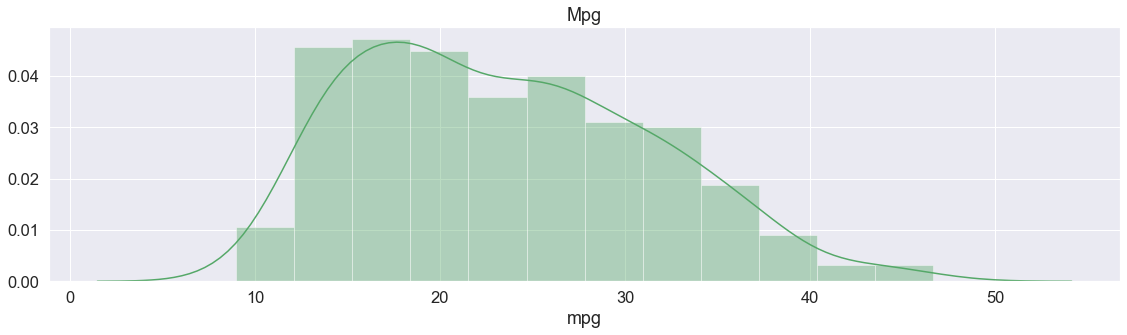

In [674]:
for feature in data.select_dtypes("number").columns:
    if feature == "yr":
        continue
    plt.figure(figsize=(16,5))
    #sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    #plt.xlim(df[feature].min(), df[feature].max())
    sns.distplot(data[feature], color = 'g')
    plt.title(f"{feature.capitalize()}")
    plt.tight_layout()
    #plt.show()

### Obsrvation 

- Acceleration have nearly normal distribution 
- wt is positively skewed with high outliers (mainly from American manufacturers)
- mpg is also positively skewed. The high mpg values are from Asian manufacturers
- 4 is the mode for number of cylinders. Most European and Asian manufacturers use 4 cylinders to get high mileage

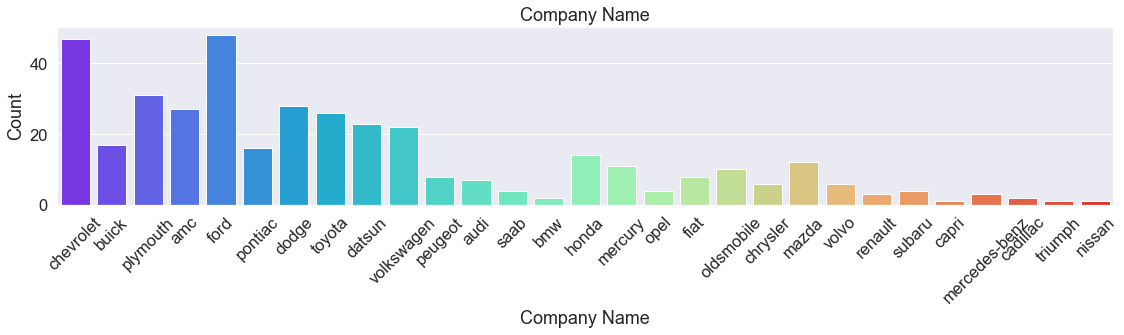

In [675]:
plt.figure(figsize=(16,5));
sns.countplot(data['Mfg'],palette = "rainbow")
#data_rem.groupby("Company_Name")["Company_Name"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Company Name")
plt.ylabel("Count")
plt.xlabel("Company Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations

- Most car manufacturers in the data set are Americans 
- Europeans seem to have lowest represenattion 
- Asians also have low representation with Honda and Toyota being highest

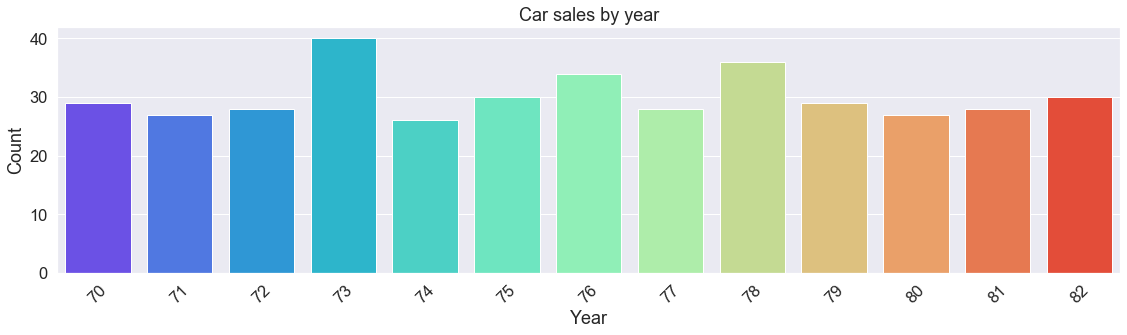

In [676]:
plt.figure(figsize=(16,5));
sns.countplot(data['yr'],palette = "rainbow")
#data_rem.groupby("yr")["yr"].count().sort_index().plot(kind="bar")
plt.title("Car sales by year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations

- Most years have similar sales 
- 1973, 1976 and 1978 are good years with sligjtly higher sales

In [677]:
data["cyl"].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cyl, dtype: int64

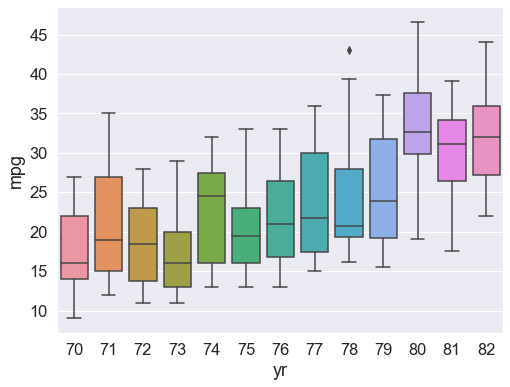

In [678]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='yr', y="mpg", data=data)


### Insight

- Newer cars have higher fuel efficiency as compared to older cars
- There is a general increase in fuel efficiency from 1976 onwards 
- Before 1976, mosts cars had similar fuel efficiency
- After 1979 the fuel efficiency of most cars are above the above the mean fuel efficiency value of the dataset
- This might be because of tighter regulations introduced for vehicles

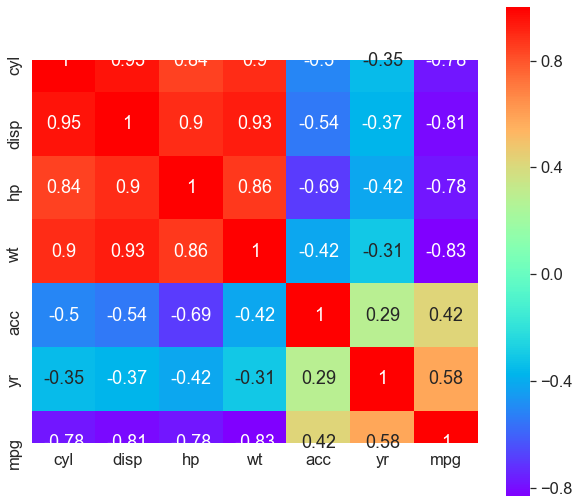

In [680]:
mat_corr = data.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(mat_corr, square=True, annot= True, cmap='rainbow');

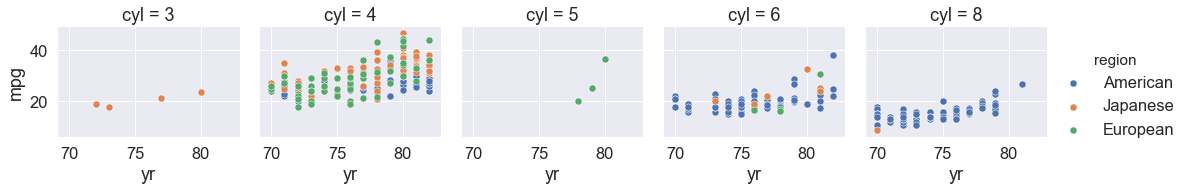

In [681]:
kws = dict(s=50, linewidth=0.5, edgecolor="w")
g = sns.FacetGrid(data, col="cyl",  hue="region")
g = (g.map(plt.scatter, "yr", "mpg", **kws)
      .add_legend())

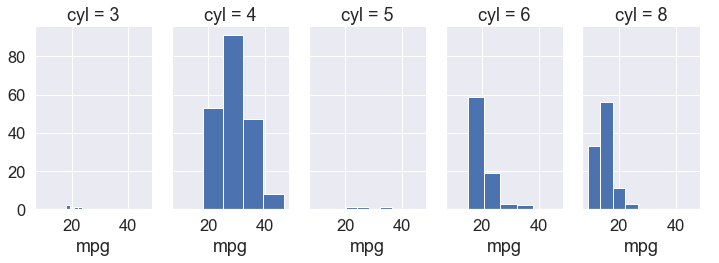

In [682]:
#kws = dict(s=50, linewidth=0.5, edgecolor="w")
g = sns.FacetGrid(data, col="cyl",  height=4, aspect=.5)
g = (g.map(plt.hist, "mpg", bins=4)
      .add_legend())

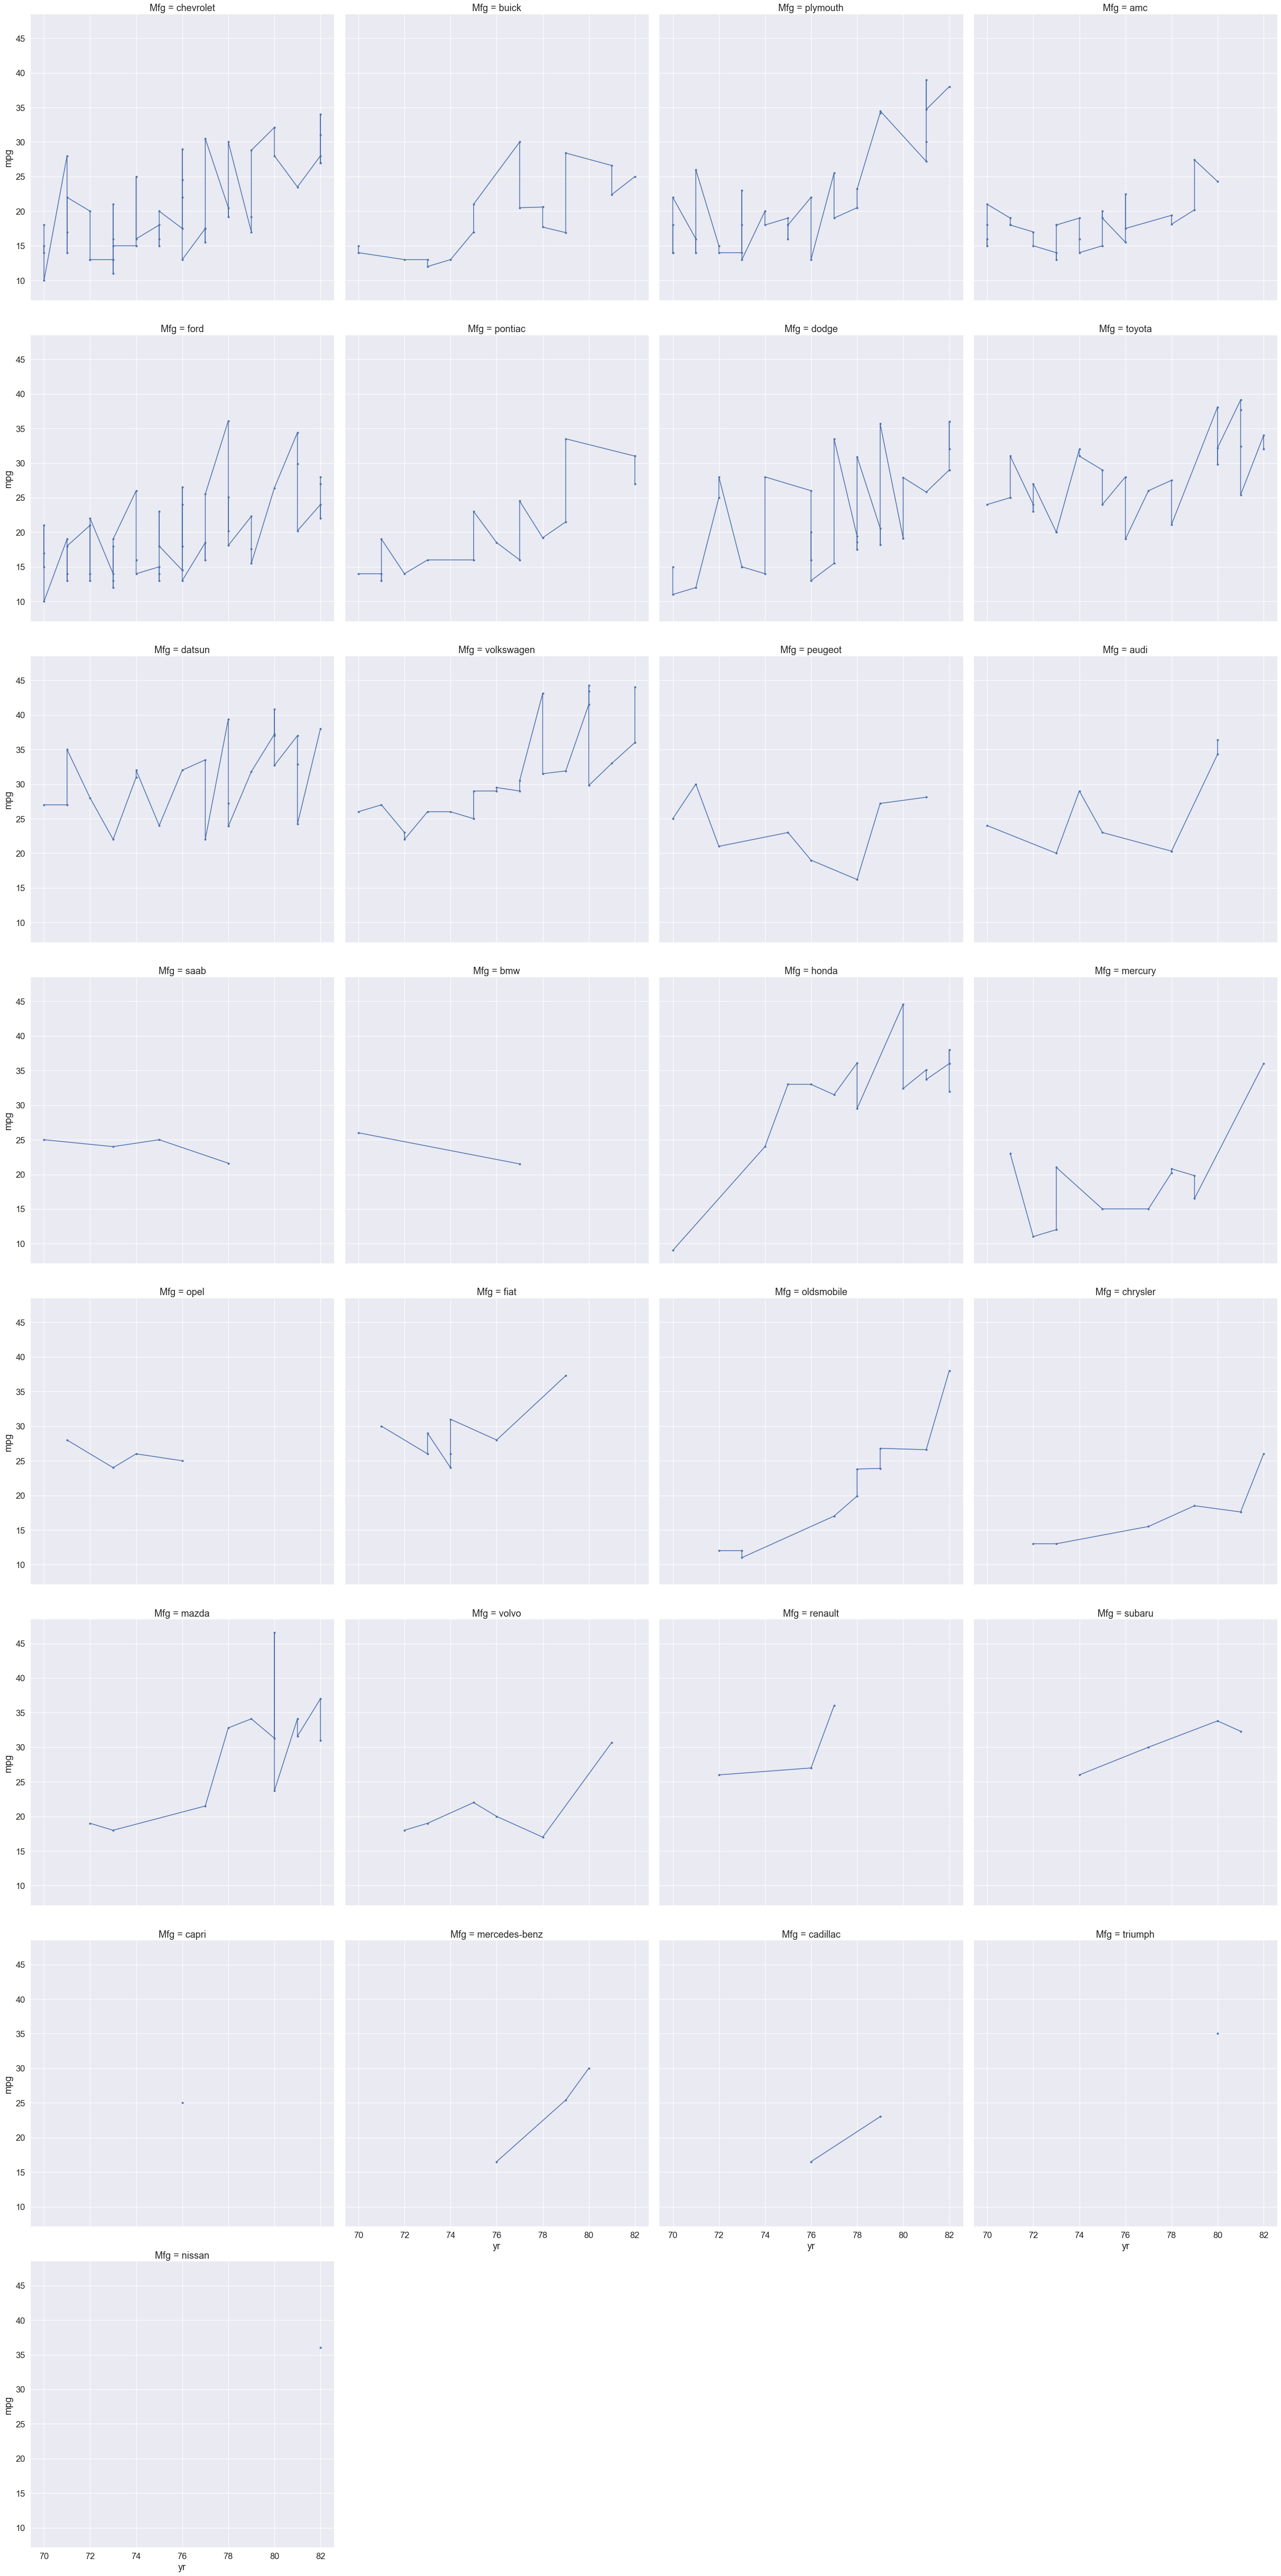

In [683]:
g = sns.FacetGrid(data, col="Mfg", col_wrap=4, height=8.5)
g = g.map(plt.plot, "yr", "mpg", marker=".")

### K-MEANS

In [684]:
sns.set()

In [685]:
data.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'Mfg', 'Model Name',
       'region'],
      dtype='object')

In [686]:
data.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,Mfg,Model Name,region
0,8,307.0,130,3504,12.0,70,18.0,chevrolet,chevelle malibu,American
1,8,350.0,165,3693,11.5,70,15.0,buick,skylark 320,American
2,8,318.0,150,3436,11.0,70,18.0,plymouth,satellite,American
3,8,304.0,150,3433,12.0,70,16.0,amc,rebel sst,American
4,8,302.0,140,3449,10.5,70,17.0,ford,torino,American


In [687]:
X = data.drop(['Mfg','Model Name', 'mpg','region'], axis = 1)
y = data['mpg']
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [688]:
X

,cyl,disp,hp,wt,acc,yr
0,8,307.0,130,3504,12.0,70
1,8,350.0,165,3693,11.5,70
2,8,318.0,150,3436,11.0,70
3,8,304.0,150,3433,12.0,70
4,8,302.0,140,3449,10.5,70
5,8,429.0,198,4341,10.0,70
6,8,454.0,220,4354,9.0,70
7,8,440.0,215,4312,8.5,70
8,8,455.0,225,4425,10.0,70
9,8,390.0,190,3850,8.5,70


In [689]:
y.isna().sum()

0

In [690]:
y.shape

(392,)

In [691]:
X_s

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ,
        -1.62531533],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362,
        -1.62531533],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924,
        -1.62531533],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ,
         1.63640964],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813,
         1.63640964],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312,
         1.63640964]])

In [692]:
X_s.shape

(392, 6)

In [693]:
cluster_range = range( 1, 15)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, init = 'k-means++')
  clusters.fit(X_s)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2352.000000
1,2,1051.136118
2,3,793.725618
3,4,631.157202
4,5,556.293627
5,6,487.354782
6,7,443.132862
7,8,400.309787
8,9,370.404663
9,10,340.676496


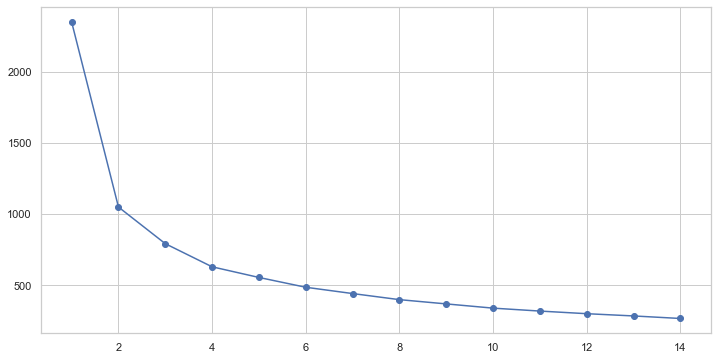

In [694]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [695]:
kmeans = KMeans(n_clusters=2,init = 'k-means++')

# Fitting the input data

kmeans = kmeans.fit(X_s)

# Getting the cluster labels

labels = kmeans.predict(X_s)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.52771712 -0.51650051 -0.50808676 -0.47943803  0.34931874  0.20751739]
 [ 1.46137048  1.43030912  1.40700948  1.32767456 -0.9673442  -0.57466354]]


In [696]:
centroid_df = pd.DataFrame(centroids, columns =X.columns )
centroid_df.head()

,cyl,disp,hp,wt,acc,yr
0,-0.527717,-0.516501,-0.508087,-0.479438,0.349319,0.207517
1,1.461370,1.430309,1.407009,1.327675,-0.967344,-0.574664


In [697]:
X_df = pd.DataFrame(X_s, columns = X.columns)
X_df["labels"] = labels
X_df.head(10)

,cyl,disp,hp,wt,acc,yr,labels
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,1
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,1
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,1
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,1
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,1
5,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,1
6,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,1
7,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,1
8,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,1
9,1.483947,1.871469,2.224924,1.028406,-2.555517,-1.625315,1


In [698]:
X_df.shape

(392, 7)

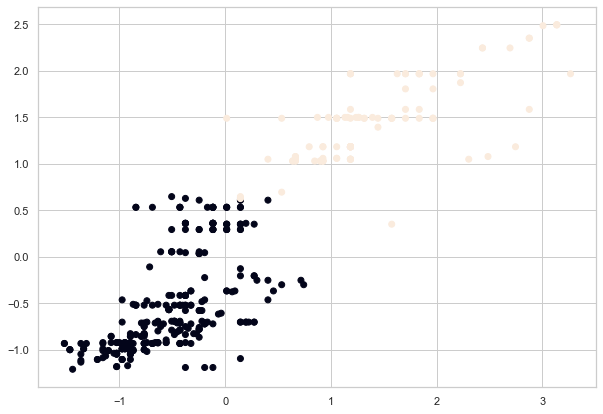

In [699]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_df['hp'], X_df['disp'], c=labels) 

In [700]:
X_df.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr
labels,,,,,,
0,288,288,288,288,288,288
1,104,104,104,104,104,104


In [701]:
y.isna().sum()

0

In [702]:
y.shape

(392,)

In [703]:
X_df['mpg'] = y
X_df.head()

,cyl,disp,hp,wt,acc,yr,labels,mpg
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,1,18.0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,1,15.0
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,1,18.0
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,1,16.0
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,1,17.0


In [704]:
X_df.isna().sum()

cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
labels    0
mpg       6
dtype: int64

In [705]:
X_df=X_df[X_df.mpg.isna()== False]

In [706]:
X_df[X_df.mpg.isna()]

,cyl,disp,hp,wt,acc,yr,labels,mpg


In [707]:
X_df.shape

(386, 8)

In [708]:
X['mpg'] = y
X.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [709]:
X.isna().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [710]:
X_0 = X_df[X_df['labels'] == 0]
X_1 = X_df[X_df['labels'] == 1]

In [711]:
X_0.shape

(282, 8)

In [712]:
X_1.shape

(104, 8)

In [713]:
X_0.isna().sum()

cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
labels    0
mpg       0
dtype: int64

In [714]:
X = X_0.drop(['mpg','labels'], axis = 1)
y = X_0['mpg']

In [715]:
X.shape

(282, 6)

In [716]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [717]:
lr = LinearRegression()
sfs1 = sfs(lr, k_features = 6, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)

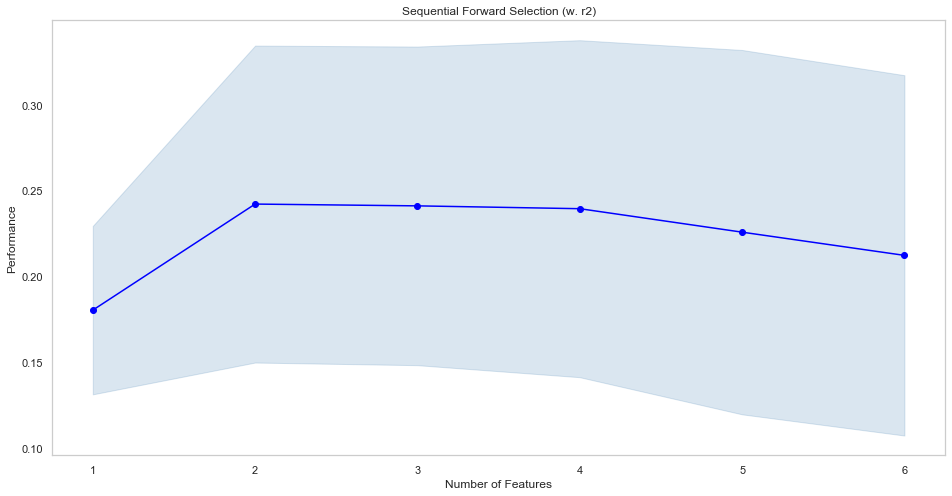

In [718]:
fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. r2)')
plt.grid()
plt.show()

In [719]:
sfs1 = sfs(lr, k_features = 2, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)
sfs1.get_metric_dict()
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[3, 5]
['wt', 'yr']


In [720]:
lr.fit(X_train[subsetColumnList], y_train)
train_score_cluster_0 = lr.score(X_train[subsetColumnList], y_train)
parameters_0 = []

In [721]:
test_score_cluster_0 = lr.score(X_test[subsetColumnList], y_test)

In [722]:
parameters_0  = lr.coef_

In [723]:
lr.coef_

array([-3.07501733,  3.47151788])

In [724]:
parameters_0 = np.append(parameters_0, np.array(lr.intercept_))

In [725]:
parameters_0 = np.append(parameters_0, np.array(train_score_cluster_0))

In [726]:
parameters_0 = np.append(parameters_0, np.array(test_score_cluster_0))

In [727]:
parameters_0

array([-3.07501733,  3.47151788, 23.47273926,  0.29901823,  0.35522314])

In [728]:
param_df_0 = pd.DataFrame(parameters_0, index = ['Coeff 1' ,'Coeff 2',   'Intercept', 'Training R2', 'Testing R2'])
param_df_0

,0
Coeff 1,-3.075017
Coeff 2,3.471518
Intercept,23.472739
Training R2,0.299018
Testing R2,0.355223


In [729]:
X = X_1.drop(['mpg','labels'], axis = 1)
y = X_1['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
lr = LinearRegression()
sfs1 = sfs(lr, k_features = 6, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)


In [730]:
y


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
25     10.0
26     10.0
27     11.0
28      9.0
37     18.0
38     14.0
39     14.0
40     14.0
41     14.0
42     12.0
43     13.0
44     13.0
61     21.0
62     13.0
63     14.0
64     15.0
       ... 
206    26.5
210    19.0
211    16.5
212    16.5
213    13.0
219    25.5
220    33.5
221    17.5
222    17.0
227    19.0
228    18.5
229    16.0
230    15.5
247    39.4
248    36.1
249    19.9
260    18.6
261    18.1
262    19.2
263    17.7
283    20.2
284    20.6
285    17.0
286    17.6
287    16.5
288    18.2
289    16.9
290    15.5
296    27.4
359    28.1
Name: mpg, Length: 104, dtype: float64

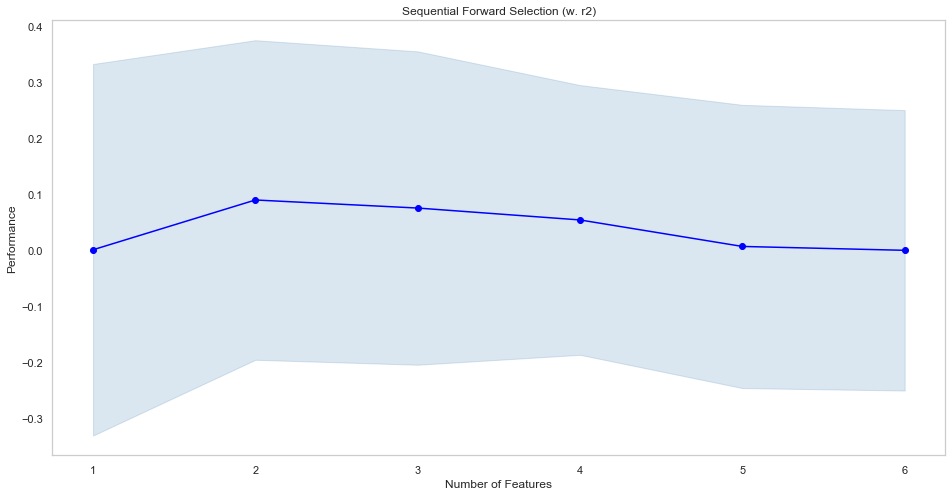

In [731]:
fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. r2)')
plt.grid()
plt.show()


In [768]:
sfs1 = sfs(lr, k_features = 2, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)
sfs1.get_metric_dict()
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[2, 5]
['hp', 'yr']


In [769]:
lr.fit(X_train[subsetColumnList], y_train)
train_score_cluster_1 = lr.score(X_train[subsetColumnList], y_train)
test_score_cluster_1 = lr.score(X_test[subsetColumnList], y_test)

print("Train Score", train_score_cluster_1)
print("Test Score", test_score_cluster_1)

Train Score 0.33817015708223896
Test Score 0.20287572201228257


In [773]:
parameters_1  = lr.coef_
parameters_1 = np.append(parameters_1, np.array(lr.intercept_))
parameters_1 = np.append(parameters_1, np.array(train_score_cluster_1))
parameters_1 = np.append(parameters_1, np.array(test_score_cluster_1))
parameters_1

array([-3.94796851,  3.23491889, 23.82034595,  0.33817016,  0.20287572])

In [774]:
param_df_1 = pd.DataFrame(parameters_1, index = ['Coeff 1' ,'Coeff 2', 'Intercept','Training R2', 'Testing R2'])
param_df_1

,0
Coeff 1,-3.947969
Coeff 2,3.234919
Intercept,23.820346
Training R2,0.338170
Testing R2,0.202876


## Hierarchichal Clustering

In [736]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [737]:
X = data.drop(['Mfg','Model Name', 'mpg','region'], axis = 1)
y = data.mpg
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_df = pd.DataFrame(X_s, columns = X.columns)

#X_df = X_df.drop('mpg', axis = 1)
# Case 1: Ward Method
Z = linkage(X_df, 'ward')
c, coph_dists = cophenet(Z , pdist(X_df)) #pdist captures within cluster variation
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(X_df, 'average')
c, coph_dists = cophenet(Z , pdist(X_df))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(X_df, 'complete')
c, coph_dists = cophenet(Z , pdist(X_df))
print("Complete",c)
# Case 3: Single Linkage
Z = linkage(X_df, 'single')
c, coph_dists = cophenet(Z , pdist(X_df))
print("Complete",c)

Ward 0.7913412516625254
Average 0.8046750644580253
Complete 0.6689160661527802
Complete 0.7620618538418715


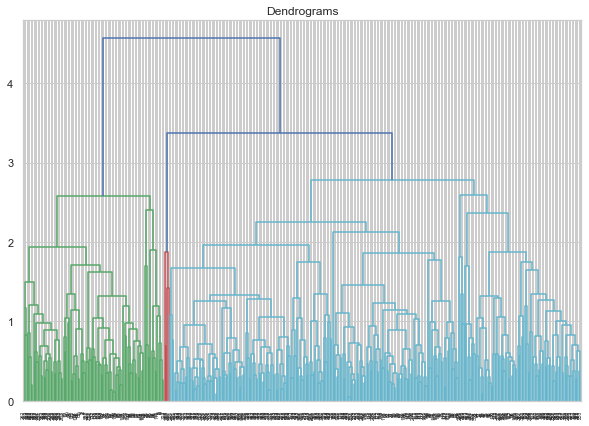

In [738]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_df, method='average'))

In [739]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(X_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [740]:
X_df['labels'] = cluster.labels_
X_df.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr
labels,,,,,,
0,163,163,163,163,163,163
1,229,229,229,229,229,229


In [741]:
X_df.head()

,cyl,disp,hp,wt,acc,yr,labels
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,0
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,0
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0


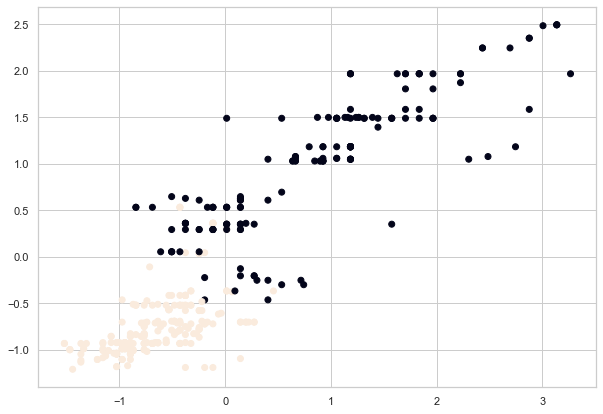

In [742]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_df['hp'], X_df['disp'], c=cluster.labels_) 

In [743]:
X_df['mpg'] = y
X_df.head()

,cyl,disp,hp,wt,acc,yr,labels,mpg
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0,18.0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0,15.0
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,0,18.0
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,0,16.0
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0,17.0


In [744]:
X_df.shape

(392, 8)

In [745]:
X_df=X_df[X_df.mpg.isna()== False]

In [746]:
X_df.shape

(386, 8)

In [747]:
X_0 = X_df[X_df['labels'] == 0]
X_1 = X_df[X_df['labels'] == 1]

In [748]:
X = X_0.drop(['mpg','labels'], axis = 1)
y = X_0['mpg']

In [749]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [750]:
lr = LinearRegression()
sfs1 = sfs(lr, k_features = 6, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)

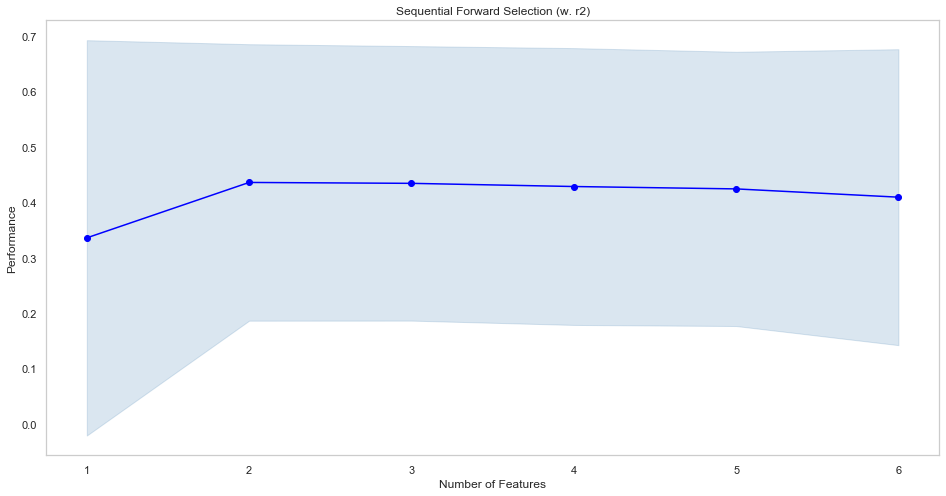

In [751]:
fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. r2)')
plt.grid()
plt.show()

In [752]:
sfs1 = sfs(lr, k_features = 2, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)
sfs1.get_metric_dict()
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[3, 5]
['wt', 'yr']


In [753]:
lr.fit(X_train[subsetColumnList], y_train)
train_score_cluster_0 = lr.score(X_train[subsetColumnList], y_train)
parameters_0 = []

In [754]:
test_score_cluster_0 = lr.score(X_test[subsetColumnList], y_test)

In [755]:
parameters_0  = lr.coef_

In [756]:
parameters_0 = np.append(parameters_0, np.array(lr.intercept_))
parameters_0 = np.append(parameters_0, np.array(train_score_cluster_0))
parameters_0 = np.append(parameters_0, np.array(test_score_cluster_0))
parameters_0

array([-3.17879229,  3.87322399, 23.10581436,  0.51883196,  0.34212023])

In [757]:
param_df_0 = pd.DataFrame(parameters_0, index = ['Coeff 1' ,'Coeff 2',  'Intercept', 'Training R2', 'Testing R2'])
param_df_0

,0
Coeff 1,-3.178792
Coeff 2,3.873224
Intercept,23.105814
Training R2,0.518832
Testing R2,0.342120


In [758]:
X = X_1.drop(['mpg','labels'], axis = 1)
y = X_1['mpg']

In [759]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [760]:
lr = LinearRegression()
sfs1 = sfs(lr, k_features = 6, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)

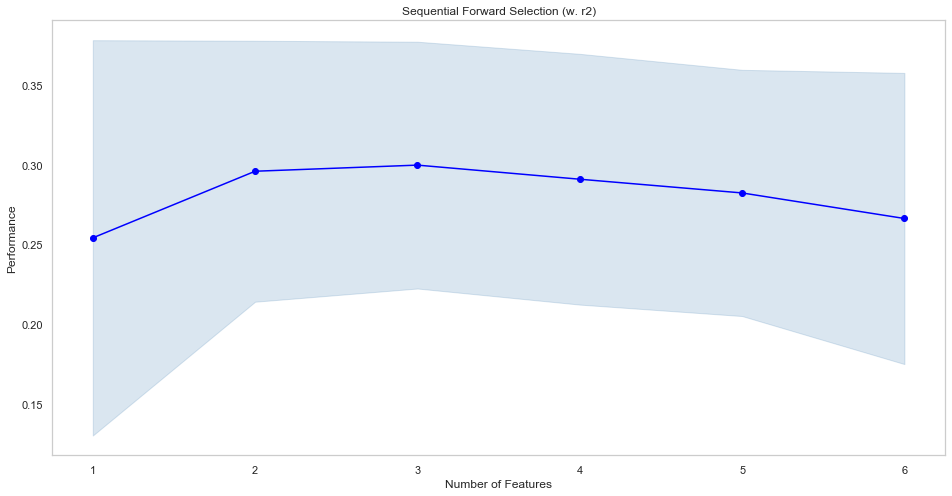

In [761]:
fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. r2)')
plt.grid()
plt.show()

In [762]:
sfs1 = sfs(lr, k_features = 3, forward = True, scoring = 'r2', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)
sfs1.get_metric_dict()
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 2, 5]
['cyl', 'hp', 'yr']


In [763]:
lr.fit(X_train[subsetColumnList], y_train)
train_score_cluster_1 = lr.score(X_train[subsetColumnList], y_train)
parameters_1 = []

In [764]:
test_score_cluster_1 = lr.score(X_test[subsetColumnList], y_test)

In [765]:
parameters_1  = lr.coef_

In [766]:
parameters_1 = np.append(parameters_1, np.array(lr.intercept_))
parameters_1 = np.append(parameters_1, np.array(train_score_cluster_1))
parameters_1 = np.append(parameters_1, np.array(test_score_cluster_1))
parameters_1

array([-1.61578384, -3.61703762,  3.0815557 , 22.81590609,  0.34427558,
        0.20527515])

In [767]:
param_df_1 = pd.DataFrame(parameters_1, index = ['Coeff 1' ,'Coeff 2',  'Coeff 3', 'Intercept', 'Training R2', 'Testing R2'])
param_df_1

,0
Coeff 1,-1.615784
Coeff 2,-3.617038
Coeff 3,3.081556
Intercept,22.815906
Training R2,0.344276
Testing R2,0.205275
